In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec
import scipy
from scipy.stats import pearsonr
from scipy.spatial import distance
# from scipy.spatial
from scipy.stats.mstats import gmean
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess 
from skmisc.loess import loess
%matplotlib inline
from itertools import combinations
from itertools import chain
from itertools import product
import statsmodels
from sklearn.manifold import TSNE
import umap

from adjustText import adjust_text

from multiprocessing import Pool
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

# fgm_simulation_path = '/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/Simulations/FGM_simulation_callable.py'
# sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))
# from FGM_simulation_callable import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
graphs_path = '../code/graphs.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
sys.path.append(os.path.dirname(os.path.expanduser(graphs_path)))
import tools
import graphs
from tools import mutant_colorset
from tools import condition_colorset
from tools import renamed_conditions

In [2]:
cov_thresh = 1e6

# fitness_data = p.read_csv('../data/DoubleBC_Merged_Fitness_Atish_Weighted_Default_AllConditions_IncludingOld_swapsremoved.csv')
# fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved.csv')
fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved_neutral2xpass.csv')

merged_fitness_data = fitness_data

In [3]:
np.random.seed(953527608) # for exact figure reproducibility and sets used in main text, use this seed

this_data = merged_fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
# this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()

this_data = this_data.sort_values('barcode')

minimal_training_bcs, minimal_testing_bcs = tools.select_train_test_mutants(this_data,max_train=20,max_test=200)

In [4]:
old_conditions = {
#                   '3':['t3.1','t3.2','t3.3'],
#                   '6':['t6.1','t6.2','t6.3'],
#                   '13':['t13.1','t13.2','t13.3'],
#                   '18':['t18.1','t18.2','t18.3'],
                  '19':['t19.1','t19.2','t19.3'],
#                   '20':['t20.1','t20.2','t20.3'],
#                   '21':['t21.1','t21.2','t21.3'],
#                   '23':['t23.1','t23.2','t23.3'],
                  'M3_Batch_3':['3.1','3.2','3.3'],
                  'M3_Batch_6':['6.1','6.2','6.3'],
                  'M3_Batch_13':['13.1','13.2','13.3'],
                  'M3_Batch_18':['18.1','18.2','18.3'],
#                   'M3_Batch_19':['t19.1','t19.2','t19.3'],
                  'M3_Batch_20':['20.1','20.2','20.3'],
                  'M3_Batch_21':['21.1','21.2','21.3'],
                  'M3_Batch_23':['23.1','23.2','23.3'],
                    ## radicicol
                    ## benomyl
                    ## fluconazole

    
    }

bigbatch_conditions = {
                        '1BB_M3':['A','B','C','D'],
                        '1BB_Baffle':['E','F'],
                        '1BB_1.4%Gluc' :['G','H'],
                        '1BB_1.8%Gluc' :['I','J'],
                        '1BB_0.2MNaCl' :['K','L'],
#                         '1BB_0.2MNaCl' :['K'], 
                        '1BB_0.5MNaCl' :['M','N'],
                        '1BB_0.2MKCl' :['O'],
                        '1BB_0.5MKCl' :['P'],
                        '1BB_8.5uMGdA' :['Q','R'],
                        '1BB_17uMGdA' :['S','T'],
                        '1BB_2ugFlu' :['U','V'],
                        '1BB_0.5ugFlu' :['W','X'],
                        '1BB_1%Raf' :['Y','Z'],
                        '1BB_0.5%Raf' :['AA','BB'],
                        '1BB_1%Gly' :['CC','DD'],
                        '1BB_1%EtOH' :['EE','FF'],
                        '1BB_SucRaf' :['GG'],
                      }



# old_nonm3_conditions = [
# #     '1.4Glucose', '1.6Glucose', '1.7Glucose', '1.8Glucose',
#        '2.5Glucose', '24_Hour_Transfer_PC', 'Benomyl_2ug/mL',
#        'DMSO', 'Ferm_40_Hour_Transfer', 'Ferm_44_Hour_Transfer',
#        'Ferm_50_Hour_Transfer', 'Ferm_54_Hour_Transfer',
#        'Fluconazole_2ug/mL', 'Geldanamycin8.5uM','Radicicol_5uM', 'Resp_5_Day_Transfer',
#        'Resp_7_Day_Transfer']

old_nonm3_conditions = {'Ferm_44hr_Transfer':['t14.1','t14.2','t14.3'],
                  'Ferm_40hr_Transfer':['t15.1','t15.2','t15.3'],
                  'Ferm_54hr_Transfer':['t16.1','t16.2','t16.3'],
                  'Ferm_50hr_Transfer':['t17.1','t17.2','t17.3'],
                  'Resp_24hr_Transfer':['t5.1','t5.2','t5.3'],
                  'Resp_3Day_Transfer':['t7.1','t7.2','t7.3'],
                  'Resp_4Day_Transfer':['t8.1','t8.2','t8.3'],
                  'Resp_5Day_Transfer':['t25.1','t25.2','t25.3'],
                  'Resp_6Day_Transfer':['t26.1','t26.2','t26.3'],
                  'Resp_7Day_Transfer':['t27.1','t27.2','t27.3'],
                  'DMSO':['t1.1','t1.2','t1.3'],
                  'Geldanamycin8.5uM':['t2.4','t2.5','t2.6'],
                    '1.4%':['1.4%-R1','1.4%-R2'],
                    '1.5%':['1.5%-R1','1.5%-R2'],
                    '1.6%':['1.6%-R1','1.6%-R2'],
                    '1.7%':['1.7%-R1','1.7%-R2'],
                    '1.8%':['1.8%-R1','1.8%-R2'],
                    '2.5%':['2.5%-R1','2.5%-R2'],  # not enough usable data
                    'Ben0.4':['Ben0.4-R1','Ben0.4-R2'], # not enough usable data
                    'Ben2':['Ben2-R1','Ben2-R2'], # not enough usable data
#                     'Ben10':['Ben10-R1','Ben10-R2'],
                       }




# m3_conditions = {**old_conditions,}
conditions = {**old_conditions, **bigbatch_conditions}
conditions = {**conditions, **old_nonm3_conditions}
all_conditions = conditions.keys()
all_reps = [rep for reps in conditions.values() for rep in reps]

m3_conditions = list(old_conditions.keys()) + ['1BB_M3']
m3_reps = [rep for condition in m3_conditions for rep in conditions[condition]]



In [5]:
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053] 

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359] 

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

# neutrals = full_neutral_list
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

In [6]:
this_data = merged_fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
# this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()

this_data = this_data.sort_values('barcode')

m3_cols = [col + '_fitness' for col in m3_conditions]
m3_conditions = m3_cols

nonm3_cols = [col + '_fitness' for col in bigbatch_conditions.keys() if (col + '_fitness') not in m3_cols]
nonm3_cols = nonm3_cols + [col + '_fitness' for col in old_nonm3_conditions.keys()]
nonm3_conditions = nonm3_cols

fitness_cols = m3_cols + nonm3_cols

fitness = this_data[fitness_cols].values

n_mutants = fitness.shape[0]
n_conditions = fitness.shape[1]


In [7]:
unis = np.unique(this_data[this_data['barcode'].isin(minimal_training_bcs+minimal_testing_bcs)]['mutation_type'],return_counts=True)
print(np.sum(unis[1]))
[(a,b) for a,b in zip(unis[0],unis[1])]

292


[('CYR1', 3),
 ('Diploid', 188),
 ('Diploid + Chr11Amp', 3),
 ('Diploid + Chr12Amp', 1),
 ('Diploid + IRA1', 1),
 ('Diploid + IRA2', 3),
 ('Diploid_adaptive', 11),
 ('ExpNeutral', 3),
 ('GPB1', 4),
 ('GPB2', 14),
 ('IRA1_missense', 9),
 ('IRA1_nonsense', 20),
 ('IRA1_other', 1),
 ('IRA2', 8),
 ('KOG1', 1),
 ('PDE2', 11),
 ('RAS2', 1),
 ('SCH9', 1),
 ('TFS1', 1),
 ('TOR1', 1),
 ('other_adaptive', 7)]

In [8]:
unis = np.unique(this_data[this_data['barcode'].isin(minimal_training_bcs)]['mutation_type'],return_counts=True)
print(np.sum(unis[1]))
[(a,b) for a,b in zip(unis[0],unis[1])]


60


[('CYR1', 1),
 ('Diploid', 20),
 ('Diploid + Chr11Amp', 1),
 ('Diploid + IRA2', 1),
 ('Diploid_adaptive', 5),
 ('GPB1', 2),
 ('GPB2', 7),
 ('IRA1_missense', 4),
 ('IRA1_nonsense', 10),
 ('IRA2', 4),
 ('PDE2', 5)]

In [9]:
unis = np.unique(this_data[this_data['barcode'].isin(minimal_testing_bcs)]['mutation_type'],return_counts=True)
print(np.sum(unis[1]))
[(a,b) for a,b in zip(unis[0],unis[1])]

232


[('CYR1', 2),
 ('Diploid', 168),
 ('Diploid + Chr11Amp', 2),
 ('Diploid + Chr12Amp', 1),
 ('Diploid + IRA1', 1),
 ('Diploid + IRA2', 2),
 ('Diploid_adaptive', 6),
 ('ExpNeutral', 3),
 ('GPB1', 2),
 ('GPB2', 7),
 ('IRA1_missense', 5),
 ('IRA1_nonsense', 10),
 ('IRA1_other', 1),
 ('IRA2', 4),
 ('KOG1', 1),
 ('PDE2', 6),
 ('RAS2', 1),
 ('SCH9', 1),
 ('TFS1', 1),
 ('TOR1', 1),
 ('other_adaptive', 7)]

Sort conditions by the similarity to average M3 condition. 

In order to ensure that some mutants (i.e. Diploids) don't weigh more than other mutant types in this calculation, we down weight mutant contribution by the number of representatives. 

In [11]:
used_mutants = [bc for bc in this_data['barcode'].values if bc in (list(minimal_training_bcs) + list(minimal_testing_bcs))]

In [12]:
this_data[this_data['barcode'].isin(used_mutants)]

,barcode,gene,type,ploidy,class,additional_muts,1.4%-R1_error,1.4%-R1_fitness,1.4%-R2_error,1.4%-R2_fitness,...,1BB_1%Raf_error,1BB_0.5%Raf_fitness,1BB_0.5%Raf_error,1BB_1%Gly_fitness,1BB_1%Gly_error,1BB_1%EtOH_fitness,1BB_1%EtOH_error,1BB_SucRaf_fitness,1BB_SucRaf_error,mutation_type
0,53,Diploid,Diploid,Diploid,Diploid,TIP1-upstream_point_variant; YKR012C-upstream_...,0.084168,0.561485,0.115885,0.549073,...,0.051067,0.253167,0.025377,0.324651,0.029848,0.487251,0.023327,0.331527,0.066704,Diploid
1,151,IRA1,stop_gained,Haploid,PKA,SEH1-missense_variant; ZIP1-missense_variant; ...,0.036983,1.465944,0.037611,1.643355,...,0.042757,0.993474,0.017607,1.013754,0.023293,0.667971,0.017206,0.566747,0.050538,IRA1_nonsense
3,273,IRA1,frameshift_variant,Haploid,PKA,None,0.038140,0.861384,0.039921,0.996668,...,0.042864,0.767018,0.017945,0.789914,0.023688,0.448947,0.019036,0.424815,0.051958,IRA1_nonsense
5,415,IRA1,frameshift_variant,Haploid,PKA,None,0.049059,0.933788,0.063430,1.129407,...,0.042814,0.877220,0.017811,0.957795,0.023695,0.353242,0.021149,0.387105,0.051755,IRA1_nonsense
8,689,IRA1,frameshift_variant,Haploid,PKA,RPL19A-upstream_point_variant,0.045780,0.847187,0.055017,1.094057,...,0.042973,0.981290,0.018312,1.065145,0.024688,0.654502,0.023860,0.478547,0.055007,IRA1_nonsense
14,1564,Diploid,Diploid,Diploid,Diploid,None,0.080713,0.500145,0.099068,0.642751,...,0.056817,0.164578,0.028119,0.298026,0.033491,0.458245,0.026720,0.286480,0.075927,Diploid
15,1617,PDE2,frameshift_variant,Haploid,PKA,RIF1-upstream_indel_variant,0.042769,0.689349,0.049141,0.733807,...,0.042906,0.812613,0.017978,0.750983,0.023708,0.372185,0.019429,0.454074,0.051876,PDE2
18,1866,PDE2,stop_gained,Haploid,PKA,None,0.053028,0.596218,0.065609,0.803640,...,0.043068,0.797834,0.018603,0.751161,0.024740,0.349330,0.023328,0.391563,0.055138,PDE2
19,2037,Diploid,Diploid,Diploid,Diploid,None,0.066681,0.509647,0.095082,0.436787,...,0.048051,0.275705,0.022868,0.351965,0.026848,0.492674,0.020770,0.364610,0.059401,Diploid
20,2039,Diploid + IRA2,frameshift_variant,Diploid,Adaptive Diploid,ACF2-missense_variant,0.052151,0.797925,0.059446,0.910564,...,0.057262,0.102897,0.030974,0.358454,0.034746,0.149989,0.040005,0.045370,0.098489,Diploid + IRA2


([<matplotlib.axis.YTick at 0x114f18940>,
 <a list of 6 Text yticklabel objects>)

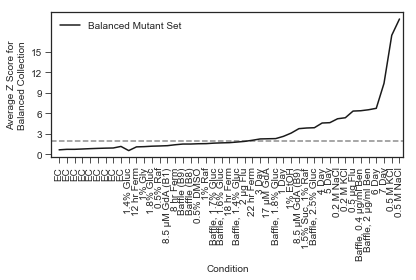

In [13]:
used_mutants = [bc for bc in this_data['barcode'].values if bc in (list(minimal_training_bcs) + list(minimal_testing_bcs))]
used_mutants = [bc for bc in this_data['barcode'].values]

all_mut_locs = sorted(list(np.where(np.isin(this_data['barcode'].values,used_mutants))[0]))

types = np.unique(this_data['mutation_type'].values[all_mut_locs])
counts = np.unique(this_data['mutation_type'].values[all_mut_locs],return_counts=True)

like_mutant_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

exceptions = {'adaptive_other':1,'Diploid_adaptive':1}
exceptions = {'adaptive_other':1}
exceptions = {}
like_mutant_count_dict = {mut_type:(like_mutant_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type]) for mut_type in types}

like_mutant_count = [like_mutant_count_dict[mut_type] for mut_type in this_data['mutation_type'].values[all_mut_locs]]
like_mutant_count_m3 = np.repeat(like_mutant_count,len(m3_cols)).reshape(len(like_mutant_count),len(m3_cols))
like_mutant_count_nonm3 = np.repeat(like_mutant_count,len(nonm3_cols)).reshape(len(like_mutant_count),len(nonm3_cols))     
# rel_mutant_count_m3 = 

m3_means = np.nanmean(this_data[m3_cols].values[all_mut_locs,:],axis=1)
m3_stds = np.nanstd(this_data[m3_cols].values[all_mut_locs,:],axis=1)

repeated_means = np.repeat(m3_means,len(nonm3_cols)).reshape(len(m3_means),len(nonm3_cols))
repeated_stds = np.repeat(m3_stds,len(nonm3_cols)).reshape(len(m3_stds),len(nonm3_cols))
nonm3_z_scores = np.abs((this_data[nonm3_cols].values[all_mut_locs,:]-repeated_means)/repeated_stds)

repeated_means = np.repeat(m3_means,len(m3_cols)).reshape(len(m3_means),len(m3_cols))
repeated_stds = np.repeat(m3_stds,len(m3_cols)).reshape(len(m3_stds),len(m3_cols))
m3_z_scores = np.abs((this_data[m3_cols].values[all_mut_locs,:]-repeated_means)/repeated_stds)

mean_m3_z_scores = np.sum(m3_z_scores/like_mutant_count_m3,axis=0)/len(counts[0])
mean_nonm3_z_scores = np.sum(nonm3_z_scores/like_mutant_count_nonm3,axis=0)/len(counts[0])

plt.figure()

sorted_nonm3_cols = np.asarray(nonm3_cols)[np.argsort(np.sum(nonm3_z_scores/like_mutant_count_nonm3,axis=0)/len(counts[0]))]
sorted_m3_cols = np.asarray(m3_cols)[np.argsort(np.sum(m3_z_scores/like_mutant_count_m3,axis=0)/len(counts[0]))]

sorted_mean_m3_z_scores = sorted(np.sum(m3_z_scores/like_mutant_count_m3,axis=0)/len(counts[0]))
sorted_mean_nonm3_z_scores = sorted(np.sum(nonm3_z_scores/like_mutant_count_nonm3,axis=0)/len(counts[0]))

plt.plot(sorted_mean_m3_z_scores+sorted_mean_nonm3_z_scores,'-',color='k',alpha=1.0,label='Balanced Mutant Set')

all_cols = list(sorted_m3_cols)+list(sorted_nonm3_cols)
plt.xticks(range(len(all_cols)),[renamed_conditions[col.split('_fitness')[0]] for col in (all_cols)],rotation=90)


plt.legend()
# plt.ylim(0,7)
plt.xlim(-1,len(m3_conditions)+len(nonm3_conditions)-0.5)
plt.ylabel('Average Z Score for\nBalanced Collection')
plt.xlabel('Condition')

plt.tight_layout()
plt.axhline(2,color='k',linestyle='--',alpha=0.5)
plt.yticks(range(0,16,3),range(0,16,3))
# plt.savefig('z_scores_minimal_comparison.pdf',bbox_inches='tight')

In [14]:
gene_list = ['IRA1_nonsense','GPB2','PDE2','Diploid']

mean_std_bygene = {}
for gene in gene_list:
    
    used_mutants = [bc for bc in this_data[this_data['mutation_type']==gene]['barcode'].values]
    this_gene_locs =sorted(list(np.where(np.isin(this_data['barcode'].values,used_mutants))[0]))
    
    m3_means = np.nanmean(this_data[m3_cols].values[this_gene_locs,:],axis=1)
    m3_stds = np.nanstd(this_data[m3_cols].values[this_gene_locs,:],axis=1)

    mean_std_bygene[gene] = [np.mean(m3_means),np.mean(m3_stds)]

In [16]:
# fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved.csv')
fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved_neutral2xpass.csv')

merged_fitness_data = fitness_data

all_f_data = merged_fitness_data
all_f_data = all_f_data.replace([np.inf, -np.inf], np.nan)
# this_data = this_data.dropna('columns',how='all')
# this_data = this_data.dropna()

all_f_data = all_f_data.sort_values('barcode')

m3_cols = [col  for col in m3_conditions]
m3_conditions = m3_cols



In [17]:
spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]

reps = ['A','B','C','D']

within_flask = []

within_var_perms = []

for spike_ins in [spike_in_missense,spike_in_nonsense]:

    within_flask_locs = np.where(all_f_data['barcode'].isin(spike_ins))
    within_flask.append(np.nanvar(all_f_data[[col+'_fitness' for col in ['A','B','C','D']]].values[within_flask_locs,:],axis=1))
        



In [22]:
within_mis = all_f_data[all_f_data['barcode'].isin(spike_in_missense)][[f'{rep}_fitness' for rep in reps]].values
within_non = all_f_data[all_f_data['barcode'].isin(spike_in_nonsense)][[f'{rep}_fitness' for rep in reps]].values
within_both = np.mean([np.nanvar(within_mis,axis=0)]+[np.nanvar(within_non,axis=0)])

In [23]:
within_mis = all_f_data[all_f_data['barcode'].isin(spike_in_missense)][[f'{rep}_fitness' for rep in reps]].values
within_non = all_f_data[all_f_data['barcode'].isin(spike_in_nonsense)][[f'{rep}_fitness' for rep in reps]].values
within_both = np.mean([np.nanvar(within_mis,axis=0)]+[np.nanvar(within_non,axis=0)])

within_var_perms = []
for perm in range(perms):
    this_mis_perm = np.zeros(within_mis.shape)
    this_non_perm = np.zeros(within_non.shape)
    for entry in range(within_mis.shape[0]):
        this_mis_perm[entry,:] = np.random.permutation(within_mis[entry,:])
        this_non_perm[entry,:] = np.random.permutation(within_non[entry,:])

    within_var_perms.append(np.mean([np.nanvar(this_mis_perm,axis=0)]+[np.nanvar(this_non_perm,axis=0)])) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


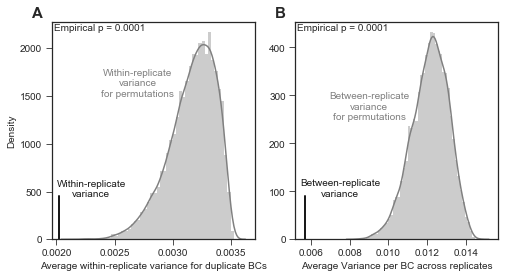

In [37]:
# fig = plt.figure(figsize=(8,8))

# big_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 6])

# ax1 = fig.add_subplot(big_gs[0])

# ax1.plot([0],np.mean(within_flask),marker='o',color='k')
# ax1.plot([1],np.mean(real_var),marker='o',color='k')
# ax1.plot([2],np.mean(np.var(this_data[m3_conditions].values,axis=1)),marker='o',color='k')
# plt.xticks([0,1,2],['Within Replicate','Between Replicates','Between Batches'])
# plt.ylabel('Average Variance')
# plt.ylim(0,0.015)
# plt.xlim(-0.2,2.2)

# lower_gs = gridspec.GridSpecFromSubplotSpec(1, 2,subplot_spec = big_gs[1], width_ratios=[1, 1])
fig = plt.figure(figsize=(8,4))
lower_gs = gridspec.GridSpec(1,2)

ax2 = fig.add_subplot(lower_gs[0])
sns.distplot(within_var_perms,color='gray',norm_hist=False)
sns.rugplot([within_both],color='k',height=0.2,lw=2)

# plt.axvline(np.mean(real_var))

r = np.sum(within_var_perms<=within_both)

plt.text(s=f'Empirical p = {(r+1)/(perms+1):.3g}',x=0.01,y=0.96,transform=plt.gca().transAxes)

plt.text(s='Within-replicate\nvariance\nfor permutations',x=0.0027,y=1500,color='gray',ha='center')
plt.text(s='Within-replicate\nvariance',x=0.0023,y=450,color='k',ha='center')
plt.xlabel('Average within-replicate variance for duplicate BCs')
plt.ylabel('Density')
plt.text(s='A',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=plt.gca().transAxes)
# plt.yscale('log') 

ax3 = fig.add_subplot(lower_gs[1])

sns.distplot(np.mean(all_perms,axis=1),color='gray',norm_hist=False,ax=ax3)
sns.rugplot([np.mean(real_var)],color='k',height=0.2,lw=2,ax=ax3)

r = np.sum(np.mean(all_perms,axis=1)<=np.mean(real_var))

ax3.text(s=f'Empirical p = {(r+1)/(perms+1):.3g}',x=0.01,y=0.96,transform=plt.gca().transAxes)

plt.text(s='Between-replicate\nvariance\nfor permutations',x=0.009,y=250,color='gray',ha='center')
plt.text(s='Between-replicate\nvariance',x=0.0075,y=90,color='k',ha='center')
plt.xlabel('Average Variance per BC across replicates')
plt.text(s='B',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=plt.gca().transAxes)
# plt.ylabel('Density')

# plt.savefig(f'noise_comparision_multipanel_{perms}perms.pdf',bbox_inches='tight')

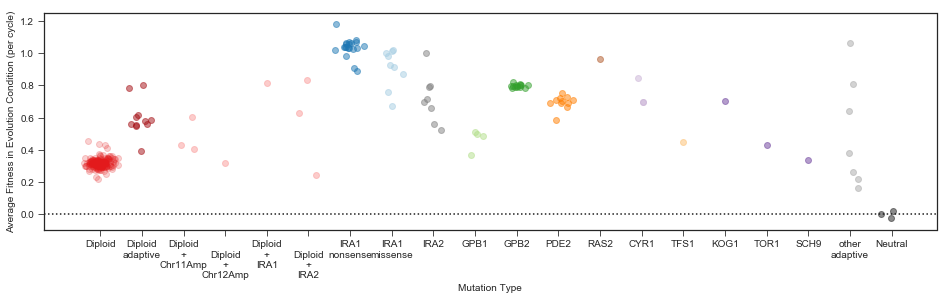

In [23]:
m3_average = np.mean(this_data[sorted_m3_cols].values,axis=1)

these_genes = this_data['mutation_type'].values

gene_means = []

for g,gene in enumerate(np.unique(these_genes)):
    locs = np.where(these_genes ==gene)[0]
    gene_means.append(np.mean(m3_average[locs]))
    
sorting = np.argsort(np.asarray(gene_means))[::-1]
sorted_genes = np.unique(these_genes)[sorting]

sorted_genes = ['Diploid','Diploid_adaptive','Diploid + Chr11Amp','Diploid + Chr12Amp','Diploid + IRA1','Diploid + IRA2',
               'IRA1_nonsense','IRA1_missense','IRA2','GPB1','GPB2','PDE2','RAS2','CYR1','TFS1','KOG1','TOR1','SCH9','other_adaptive','ExpNeutral']


plt.figure(figsize=(16,4))
for g,gene in enumerate(sorted_genes):
    locs = np.where(these_genes ==gene)[0]
    if gene == 'Diploid':
        plt.scatter([tools.jitter_point(g) for i in range(len(locs))],m3_average[locs],alpha=0.2,color=mutant_colorset[gene])    
    elif len(locs) > 1:
        plt.scatter([tools.jitter_point(g) for i in range(len(locs))],m3_average[locs],alpha=0.5,color=mutant_colorset[gene])
    else:
        plt.scatter([g for i in range(len(locs))],m3_average[locs],alpha=0.5,color=mutant_colorset[gene])      
plt.xticks(range(len(sorted_genes)),[g.replace('Diploid + IRA2','\nDiploid + IRA2').replace('Diploid + Chr12Amp','\nDiploid + Chr12Amp').replace('ExpNeutral','Neutral').replace('Diploid adaptive','High-Fitness Diploid').replace('_','\n').replace(' ','\n') for g in sorted_genes],rotation=0)

plt.ylabel('Average Fitness in Evolution Condition (per cycle)')
plt.xlabel('Mutation Type')
plt.axhline(0,color='k',linestyle=':')
# plt.savefig('m3_average_all_mutants_by_gene_venkataramorder_16x4.pdf',bbox_inches='tight')

In [18]:
from matplotlib import rc

In [34]:
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.bf'] = 'Arial:italic:bold'
plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']

[ 86.58      234.6144958] [175.86      234.6144958] 44.64000000000001


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


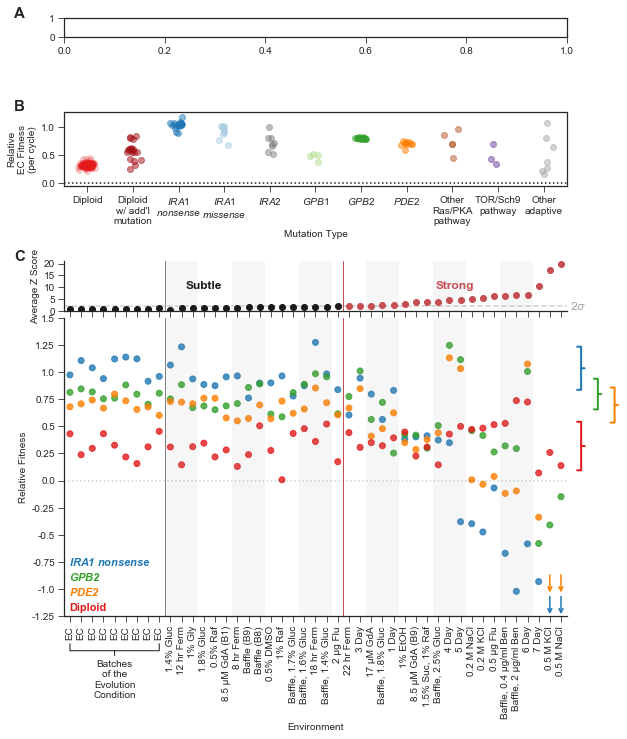

In [40]:
m3_conditions = sorted_m3_cols
nonm3_conditions = sorted_nonm3_cols

fig = plt.figure(figsize=(9,11))

big_gs = GridSpec(3, 1, height_ratios=[0.5,2,9.5],hspace=0.5)

##### Top axis is schematic (to be inserted manually)
top_ax = fig.add_subplot(big_gs[0])
plt.text(s='A',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=top_ax.transAxes)


##### Bottom axis has two parts: z score graph and "tubes" graph
bottom_gs = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec = big_gs[2], height_ratios=[1, 6],hspace=0.04)
# bottom_gs = gridspec.GridSpecFromSubplotSpec(2, 2,subplot_spec = big_gs[2], width_ratios=[8, 1], height_ratios=[1, 6],hspace=0.04,wspace=0.0)
axA = fig.add_subplot(bottom_gs[0])
plt.text(s='C',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=axA.transAxes)
sns.despine(ax=axA)
graphs.zscore_graph(axA,sorted_mean_m3_z_scores,sorted_mean_nonm3_z_scores,sorted_m3_cols,sorted_nonm3_cols,ymax=21)

all_z_scores = np.asarray(sorted_mean_m3_z_scores+sorted_mean_nonm3_z_scores)
below = all_z_scores[np.where(all_z_scores < 2)[0]]

axB = fig.add_subplot(bottom_gs[1])
sns.despine(ax=axB)
gene_list = ['IRA1_nonsense','IRA1_missense','GPB2','PDE2','Diploid']
gene_list = ['IRA1_nonsense','GPB2','PDE2','Diploid']
gene_list_labels = ['$\\bf{IRA1}$ $\\bf{nonsense}$','$\\bf{GPB2}$','$\\bf{PDE2}$','Diploid']
graphs.fitness_tubes_graph(axB,this_data,mean_std_bygene,this_data['barcode'].values,m3_conditions,nonm3_conditions,gene_list,side_bars=True,faded_alpha=0.8,gene_list_labels=gene_list_labels)

plt.axvline(x=len(below)+0.5,color='r',lw=1)

ymin = -1.25
ymax = 1.5

##### Middle axis is venkataram-style plot
middle_ax = fig.add_subplot(big_gs[1])
plt.text(s='B',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=middle_ax.transAxes)

m3_average = np.mean(this_data[sorted_m3_cols].values,axis=1)

these_genes = this_data['mutation_type'].values

gene_means = []

for g,gene in enumerate(np.unique(these_genes)):
    locs = np.where(these_genes ==gene)[0]
    gene_means.append(np.mean(m3_average[locs]))
    
sorting = np.argsort(np.asarray(gene_means))[::-1]
sorted_genes = np.unique(these_genes)[sorting]

sorted_genes = ['Diploid',['Diploid_adaptive','Diploid + Chr11Amp','Diploid + Chr12Amp','Diploid + IRA1','Diploid + IRA2'],
               'IRA1_nonsense','IRA1_missense','IRA2','GPB1','GPB2','PDE2',['RAS2','CYR1','TFS1'],['KOG1','TOR1','SCH9'],'other_adaptive']

for g,gene in enumerate(sorted_genes):
    if type(gene)!= list:
        locs = np.where(these_genes ==gene)[0]
        if gene == 'Diploid':
            plt.scatter([tools.jitter_point(g,0.075) for i in range(len(locs))],m3_average[locs],alpha=0.2,color=mutant_colorset[gene])    
        elif len(locs) > 1:
            plt.scatter([tools.jitter_point(g,0.075) for i in range(len(locs))],m3_average[locs],alpha=0.5,color=mutant_colorset[gene])
        else:
            plt.scatter([g for i in range(len(locs))],m3_average[locs],alpha=0.5,color=mutant_colorset[gene])      
    else:
        for this_gene in gene:
            locs = np.where(these_genes ==this_gene)[0]
            plt.scatter([tools.jitter_point(g,0.075) for i in range(len(locs))],m3_average[locs],alpha=0.5,color=mutant_colorset[this_gene])
    
# sorted_genes[1] = "High-fitness Diploid"
sorted_genes[1] = "Diploid\nw/ add'l\nmutation" 
sorted_genes[-3] = "Other\nRas/PKA\npathway"
sorted_genes[-2] = "TOR/Sch9\npathway"
sorted_genes[2] = "$\it{IRA1}$\n$\it{nonsense}$"
sorted_genes[3] = "$\it{IRA1}$\n$\it{missense}$"
sorted_genes[4] = "$\it{IRA2}$"
sorted_genes[5] = "$\it{GPB1}$"
sorted_genes[6] = "$\it{GPB2}$"
sorted_genes[7] = "$\it{PDE2}$"
sorted_genes[-1] = "Other\nadaptive"

plt.xticks(range(len(sorted_genes)),[g.replace('_','\n') for g in sorted_genes],rotation=0)

plt.ylabel('Relative\nEC Fitness\n(per cycle)')
plt.xlabel('Mutation Type')
plt.axhline(0,color='k',linestyle=':')
plt.xlim(-0.5,len(sorted_genes)-0.5)


plt.tight_layout() # only off when tight layout is used - might need to annotate afterwards

plt.savefig('Figure2_withoutA.pdf',bbox_inches='tight')

In [41]:
# last_subtle = 17
first_nonsubtle = np.where(np.asarray(sorted_mean_nonm3_z_scores) > 2.0)[0][0]
print('subtle: ',list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]))
print('strong: ',list(sorted_nonm3_cols[first_nonsubtle:]))

this_data = merged_fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')

datasets = {}

gene_list = ['IRA1_nonsense','GPB2','PDE2','Diploid','ExpNeutral']

datasets['subtle_to_strong_NEWSET'] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                  minimal_training_bcs,minimal_testing_bcs,gene_list)

diploid_reduction_testing = []
for bc in minimal_testing_bcs:
    if this_data[this_data['barcode']==bc]['mutation_type'].values[0] != 'Diploid':
        diploid_reduction_testing.append(bc)

datasets['subtle_to_strong_NEWSET_fewer_diploids'] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                  minimal_training_bcs,diploid_reduction_testing,gene_list)

datasets['subtle_to_strong_NEWSET_fixed_mutants'] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                  minimal_training_bcs,minimal_testing_bcs,gene_list)

training_types = np.unique(this_data[this_data['barcode'].isin(minimal_training_bcs)]['mutation_type'])
testing_types = np.unique(this_data[this_data['barcode'].isin(minimal_testing_bcs)]['mutation_type'])

testing_only_types = [t for t in testing_types if t not in training_types]
testing_only_bcs = this_data[this_data['mutation_type'].isin(testing_only_types)]['barcode'].values

datasets['subtle_to_strong_NEWSET_testingonly'] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                  minimal_training_bcs,testing_only_bcs,gene_list)

# datasets['subtle_to_strong_wothers'] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
#                   minimal_wothers_training_bcs,minimal_wothers_testing_bcs,gene_list)
# datasets['subtle_to_strong_wothers_fixed_mutants'] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
#                   minimal_wothers_training_bcs,minimal_wothers_testing_bcs,gene_list,fixed_mutant_sets=True)
# datasets['batch_to_nonbatch_wothers_fixed_mutants'] = tools.situate_data(this_data,list(sorted_m3_cols),list(sorted_nonm3_cols),
#                   minimal_wothers_training_bcs,minimal_wothers_testing_bcs,gene_list,fixed_mutant_sets=True)

# all_test_bcs = list(minimal_wothers_testing_bcs)
# for bc in this_data['barcode'].values:
#     if bc not in list(minimal_wothers_training_bcs) + list(minimal_wothers_testing_bcs):
#         all_test_bcs.append(bc)
# all_test_bcs = sorted(all_test_bcs)

# datasets['subtle_to_strong_wothers_ALLTEST'] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
#                   minimal_wothers_training_bcs,all_test_bcs,gene_list)


subtle:  ['M3_Batch_23_fitness', '19_fitness', 'M3_Batch_18_fitness', 'M3_Batch_20_fitness', 'M3_Batch_3_fitness', 'M3_Batch_13_fitness', 'M3_Batch_6_fitness', '1BB_M3_fitness', 'M3_Batch_21_fitness', '1BB_1.4%Gluc_fitness', 'Ferm_44hr_Transfer_fitness', '1BB_1%Gly_fitness', '1BB_1.8%Gluc_fitness', '1BB_0.5%Raf_fitness', 'Geldanamycin8.5uM_fitness', 'Ferm_40hr_Transfer_fitness', '1BB_Baffle_fitness', '1.5%_fitness', 'DMSO_fitness', '1BB_1%Raf_fitness', '1.7%_fitness', '1.6%_fitness', 'Ferm_50hr_Transfer_fitness', '1.4%_fitness', '1BB_2ugFlu_fitness']
strong:  ['Ferm_54hr_Transfer_fitness', 'Resp_3Day_Transfer_fitness', '1BB_17uMGdA_fitness', '1.8%_fitness', 'Resp_24hr_Transfer_fitness', '1BB_1%EtOH_fitness', '1BB_8.5uMGdA_fitness', '1BB_SucRaf_fitness', '2.5%_fitness', 'Resp_4Day_Transfer_fitness', 'Resp_5Day_Transfer_fitness', '1BB_0.2MNaCl_fitness', '1BB_0.2MKCl_fitness', '1BB_0.5ugFlu_fitness', 'Ben0.4_fitness', 'Ben2_fitness', 'Resp_6Day_Transfer_fitness', 'Resp_7Day_Transfer_fitne

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


1 0.10797563147804246
2 0.7117983339577403
3 0.7404410202662184
4 0.7371156924683387
5 0.7336086153686981
6 0.7413533988535839
7 0.7422848756308342
8 0.7491986914562223
9 0.7203998838506496
10 0.7215900148715497
11 0.7093128744603177
12 0.7036359965222418
13 0.718048907998186
14 0.7225520458891472
15 0.7177176011268362
16 0.7196439536293531
17 0.7028265531107527
18 0.7005211997815288
19 0.6852087344308222
20 0.6805970729471267
21 0.6565916333387207
22 0.641406045891481
23 0.6385391716691664
24 0.6355886059462919
25 0.5904377132012939
1 0.5453803609970826
2 0.7490905227929368
3 0.7555412906057519
4 0.7539269182418018
5 0.7491289290845382
6 0.7609176571501153
7 0.7879754943515884
8 0.8232148260861861
9 0.818339317964913
10 0.8167238366500178
11 0.8024456400997296
12 0.7979902407744563
13 0.8043864214382435
14 0.8111823816723447
15 0.808686135731133
16 0.8132668570361664
17 0.7984721997770521
18 0.7972261105067875
19 0.7912173955299517
20 0.788503109203923
21 0.7678373817326509
22 0.76759

1.1625212043847264
0.0006862562092528433
0.0008007067855557588 0.0005558530806509072 0.6942030349662864
8


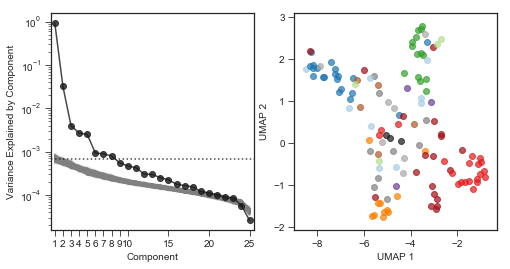

In [54]:
plt.figure(figsize=(8,4))

ax = plt.subplot(121)
these_cols = list(sorted_m3_cols)
these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
# these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:-2])

# this_fitness = this_data[this_data['barcode'].isin(list(minimal_wothers_training_bcs))][these_cols].values
# this_error = this_data[this_data['barcode'].isin(list(minimal_wothers_training_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values

# this_fitness = this_data[this_data['barcode'].isin(list(minimal_wothers_training_bcs)+list(minimal_wothers_testing_bcs))][these_cols].values
# this_error = this_data[this_data['barcode'].isin(list(minimal_wothers_training_bcs)+list(minimal_wothers_testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values

this_fitness = this_data[this_data['barcode'].isin(list(minimal_training_bcs)+list(minimal_testing_bcs))][these_cols].values
this_error = this_data[this_data['barcode'].isin(list(minimal_training_bcs)+list(minimal_testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values



ax, max_d, s, var_e_s= graphs.svd_noise_comparison_figure(ax,this_fitness,this_error,1000,yscale='log',output=True,annotate=False)
plt.ylabel('Variance Explained by Component')
plt.xlabel('Component')
plt.xticks([i+1 for i in range(10)]+[15,20,25],[i+1 for i in range(10)]+[15,20,25])
# plt.savefig('svd_detection_NEWSET.pdf',bbox_inches='tight')


np.random.seed(94305) # for exact figure match
# dataset = datasets['subtle_to_strong_wothers']
# neighbors = 20
# dataset = datasets['subtle_to_strong_wothers_ALLTEST']
# neighbors = 50
dataset = datasets['subtle_to_strong_NEWSET_fewer_diploids']
neighbors = 20



all_bcs = list(dataset['training_bcs']) +  list(dataset['testing_bcs'])
all_bcs = sorted(all_bcs)

these_bcs = all_bcs
these_indices = range(len(all_bcs))

all_genes = np.unique(this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values)
annotation_genes = all_genes

annotation_genes = ['GPB2','GPB1','IRA1_nonsense','IRA1_missense','PDE2','Diploid','Diploid_adaptive','RAS2']
annotation_genes = [gene for gene in annotation_genes if gene in all_genes]

offset = 1
model = 7
ax = plt.subplot(122)
these_locs = dataset['mut_locs'][model][these_indices,offset:]

these_bcs = all_bcs

trans = umap.UMAP(neighbors).fit(these_locs)

# for b,bc in enumerate(these_bcs):
#     mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
#     if mutant_type == 'Diploid':
#         plt.scatter(trans.embedding_[b, 0], trans.embedding_[b, 1], color=tools.mutant_colorset[mutant_type],alpha=0.5)
# for b,bc in enumerate(these_bcs):
#     mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
#     if mutant_type != 'Diploid':
#         plt.scatter(trans.embedding_[b, 0], trans.embedding_[b, 1], color=tools.mutant_colorset[mutant_type],alpha=0.7)

for b,bc in enumerate(these_bcs):
    mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
    plt.scatter(trans.embedding_[b, 0], trans.embedding_[b, 1], color=tools.mutant_colorset[mutant_type],alpha=0.7)
    
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig(f'Figure3_noA.pdf',bbox_inches='tight')

# ts = []
# for gene in annotation_genes:
#     these_bcs = this_data[this_data['mutation_type']==gene]['barcode'].values
#     ix = np.where(np.isin(all_bcs,these_bcs))[0]
#     mean_loc =  np.mean(trans.embedding_[ix,:],axis=0)
#     mean_loc = tools.geometric_median(trans.embedding_[ix,:])
#     ts.append(plt.text(mean_loc[0], mean_loc[1], color=mutant_colorset[gene],s=gene.replace('_','\n'),ha='center'))
# adjust_text(ts, x=trans.embedding_[:, 0], y=trans.embedding_[:, 1], force_points=(0.5,0.5),ha='center')

# #     plt.gca().set_aspect('equal')
# plt.savefig(f'Figure3_NEWSET_m{offset}-{model+1}_SOMEannotated_neighbors{neighbors}.pdf',bbox_inches='tight')


In [56]:
entries = np.where(((trans.embedding_[:, 0] < -2) & (trans.embedding_[:, 0] > -4) & (trans.embedding_[:, 1] < -0.75) ))[0]
clusterd_hfD = np.asarray(all_bcs)[entries]

this_data[this_data['barcode'].isin(clusterd_hfD)]

,barcode,gene,type,ploidy,class,additional_muts,1.4%-R1_error,1.4%-R1_fitness,1.4%-R2_error,1.4%-R2_fitness,...,1BB_1%Raf_error,1BB_0.5%Raf_fitness,1BB_0.5%Raf_error,1BB_1%Gly_fitness,1BB_1%Gly_error,1BB_1%EtOH_fitness,1BB_1%EtOH_error,1BB_SucRaf_fitness,1BB_SucRaf_error,mutation_type
40,4791,Diploid,Diploid,Diploid,Diploid,tL(CAA)G3-upstream_point_variant,0.047933,0.874265,0.056568,0.929685,...,0.047049,0.445281,0.021949,0.499881,0.026401,0.704311,0.020641,0.366543,0.063207,Diploid_adaptive
108,15337,Diploid,Diploid,Diploid,Diploid,VPS3-synonymous_variant,0.049847,0.981945,0.061785,0.984069,...,0.052790,0.459788,0.025152,0.515010,0.028815,0.664841,0.024222,0.398812,0.073914,Diploid_adaptive
127,19297,Diploid,Diploid,Diploid,Diploid,None,0.039630,0.840330,0.042488,0.899511,...,0.045840,0.469348,0.020488,0.500592,0.025179,0.652789,0.019466,0.376247,0.059226,Diploid_adaptive
208,40865,Diploid,Diploid,Diploid,Diploid,USO1-upstream_indel_variant,0.043280,0.952270,0.047859,1.080816,...,0.047538,0.450806,0.022514,0.541024,0.027103,0.698011,0.021250,0.425311,0.066625,Diploid_adaptive
384,148821,Diploid,Diploid,Diploid,Diploid,None,0.048783,0.902181,0.058952,1.063162,...,0.050941,0.425591,0.024269,0.506125,0.028369,0.666180,0.023140,0.371630,0.073571,Diploid_adaptive
410,189102,Diploid,Diploid,Diploid,Diploid,None,0.041123,0.853263,0.045618,0.994097,...,0.044636,0.399304,0.020011,0.495010,0.024618,0.688585,0.018633,0.320479,0.057950,Diploid_adaptive


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


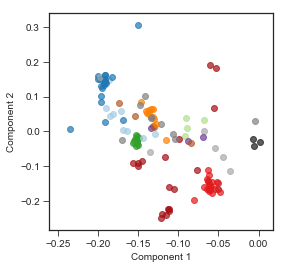

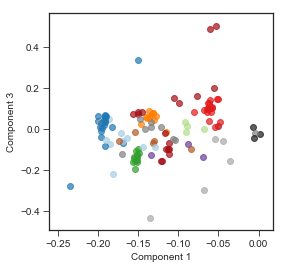

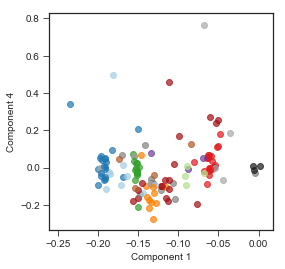

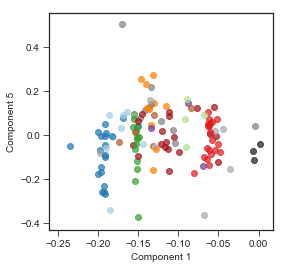

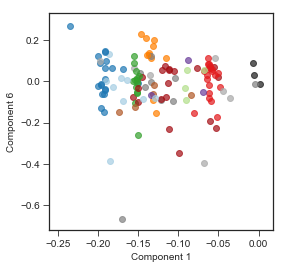

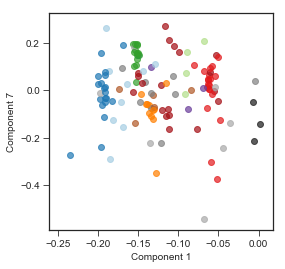

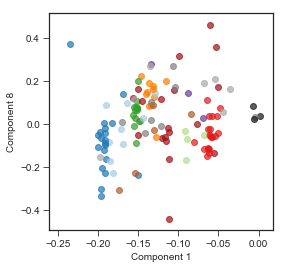

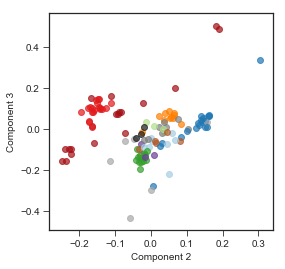

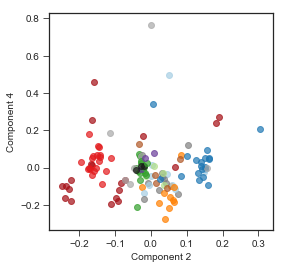

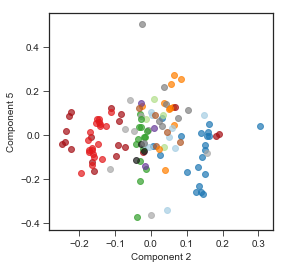

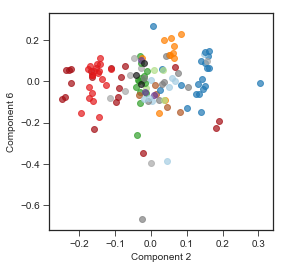

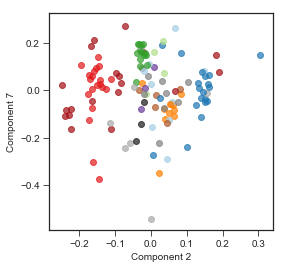

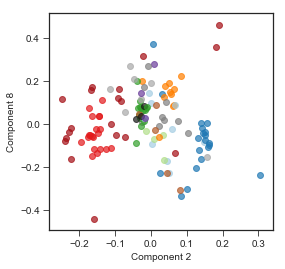

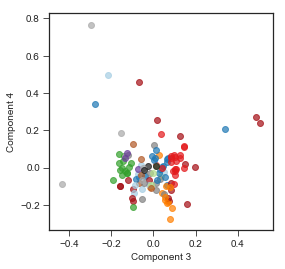

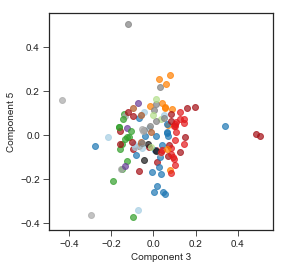

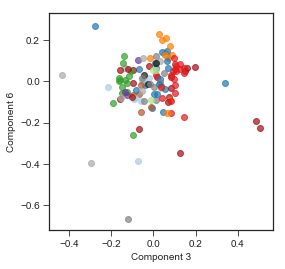

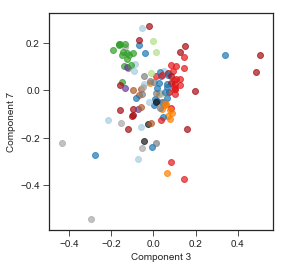

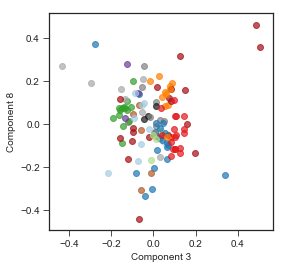

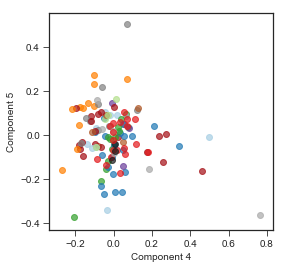

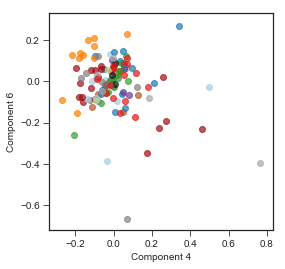

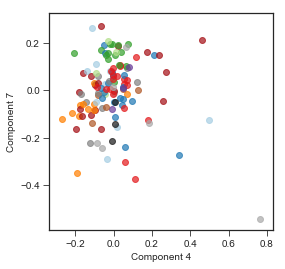

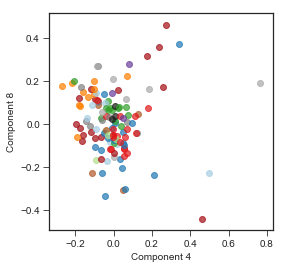

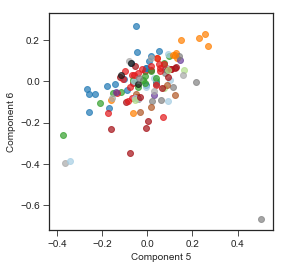

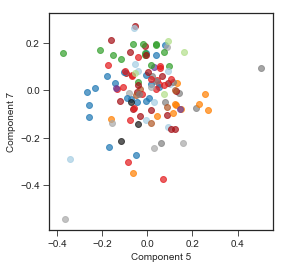

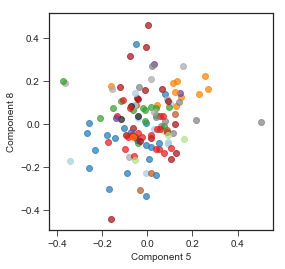

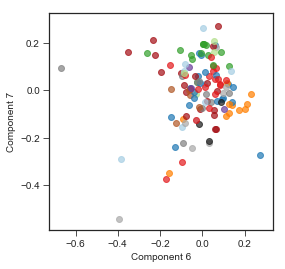

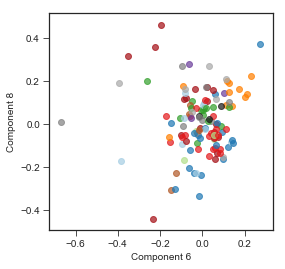

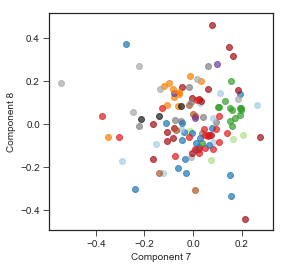

In [89]:
all_bcs = list(dataset['training_bcs']) +  list(dataset['testing_bcs'])
all_bcs = sorted(all_bcs)

model = 7

these_bcs = all_bcs
these_indices = range(len(all_bcs))

all_genes = np.unique(this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values)
annotation_genes = all_genes

annotation_genes = ['GPB2','GPB1','IRA1_nonsense','IRA1_missense','PDE2','Diploid','Diploid_adaptive','RAS2']
annotation_genes = [gene for gene in annotation_genes if gene in all_genes]

these_locs = dataset['mut_locs'][model][these_indices,:]

these_bcs = all_bcs

for x,y in combinations(range(8),2):

    plt.figure(figsize=(4,4))

    for b,bc in enumerate(these_bcs):
        mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
        plt.scatter(these_locs[b, x], these_locs[b, y], color=tools.mutant_colorset[mutant_type],alpha=0.7)

    plt.xlabel(f'Component {x+1}')
    plt.ylabel(f'Component {y+1}')

    plt.savefig(f'space_plotted/space_plotted_mutants_{x+1}_{y+1}.pdf',bbox_inches='tight')


In [55]:
dip_loc = np.where((these_locs[:, 1]>0.15)&(these_locs[:, 0]>-0.1))[0]
this_data[this_data['barcode'].isin(np.asarray(these_bcs)[dip_loc])]

,barcode,gene,type,ploidy,class,additional_muts,1.4%-R1_error,1.4%-R1_fitness,1.4%-R2_error,1.4%-R2_fitness,...,1BB_1%Raf_error,1BB_0.5%Raf_fitness,1BB_0.5%Raf_error,1BB_1%Gly_fitness,1BB_1%Gly_error,1BB_1%EtOH_fitness,1BB_1%EtOH_error,1BB_SucRaf_fitness,1BB_SucRaf_error,mutation_type
46,6174,IRA1,frameshift_variant,Haploid,PKA,YMR010W-stop_gained; YGR125W-missense_variant,0.059148,0.444324,0.090567,0.422757,...,0.043014,0.755968,0.018314,0.826817,0.024429,0.250326,0.024450,0.160149,0.055904,IRA1_nonsense
173,27473,Diploid + Chr12Amp,Diploid + Chr12Amp,Diploid,Adaptive Diploid,NUP157-missense_variant; YPR015C-missense_variant,0.080405,0.220127,0.129496,0.144254,...,0.046578,0.420659,0.026518,0.427769,0.033472,0.241793,0.035570,0.034219,0.098647,Diploid + Chr12Amp
285,71109,Diploid + Chr11Amp,Diploid + Chr11Amp,Diploid,Adaptive Diploid,None,0.112471,0.441220,0.279173,-0.064336,...,0.051665,0.364954,0.024723,0.412735,0.030014,0.419376,0.027763,0.223055,0.078733,Diploid + Chr11Amp
287,71751,Diploid + Chr11Amp,Diploid + Chr11Amp,Diploid,Adaptive Diploid,PMC1-missense_variant,0.105719,0.301485,0.187718,0.000894,...,0.054590,0.315895,0.027086,0.397498,0.032843,0.347763,0.032171,0.268825,0.091857,Diploid + Chr11Amp


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


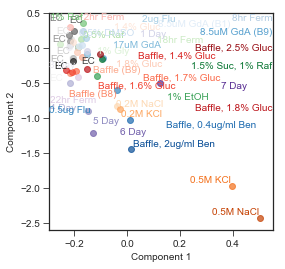

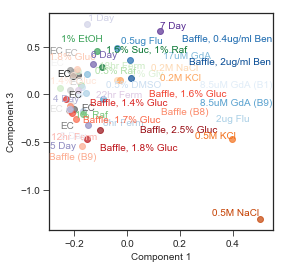

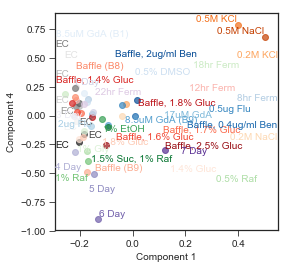

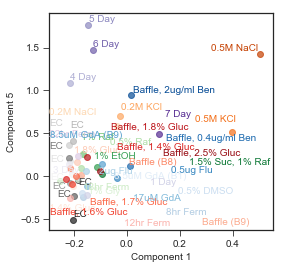

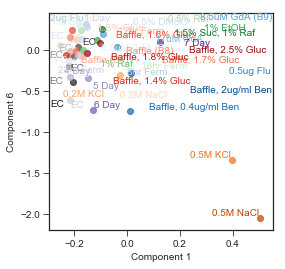

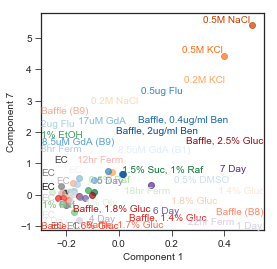

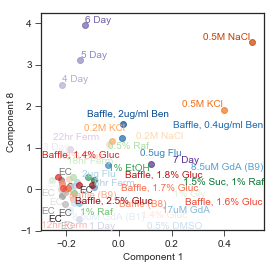

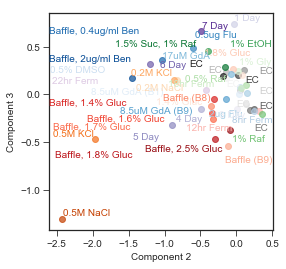

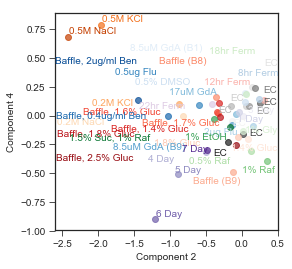

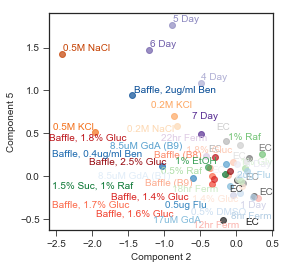

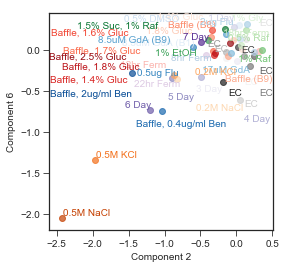

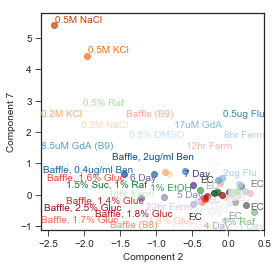

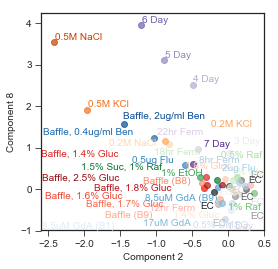

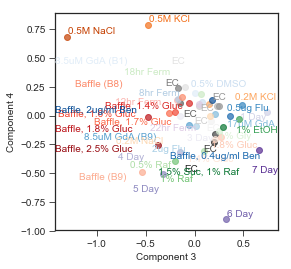

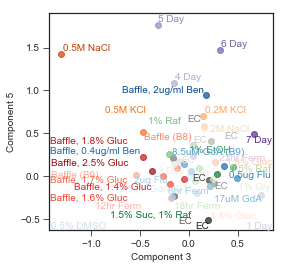

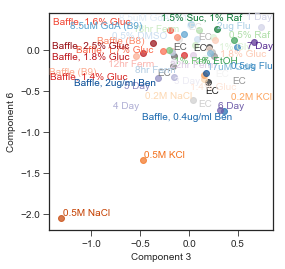

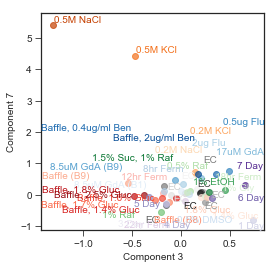

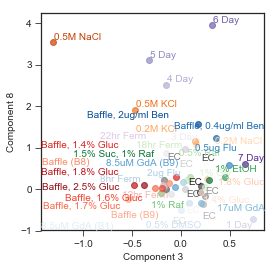

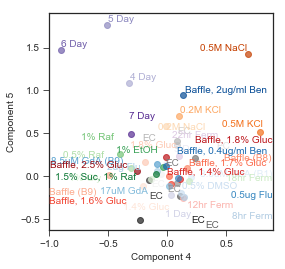

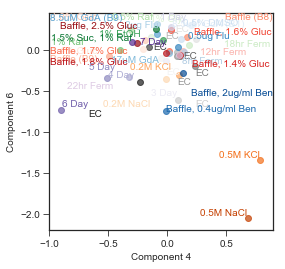

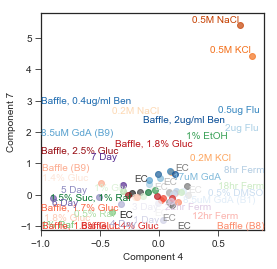

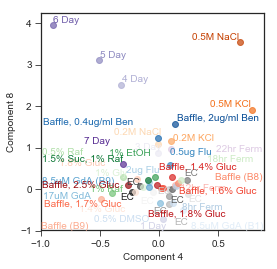

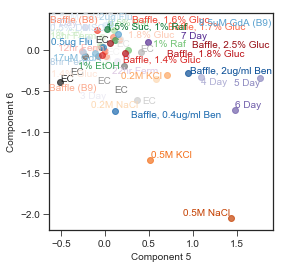

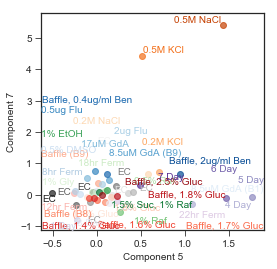

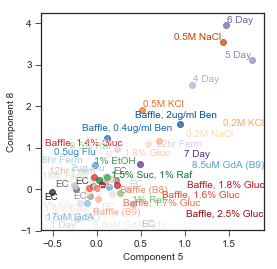

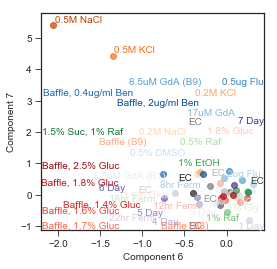

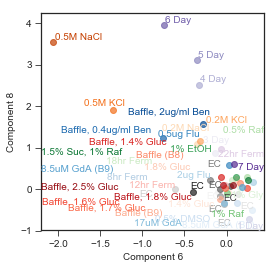

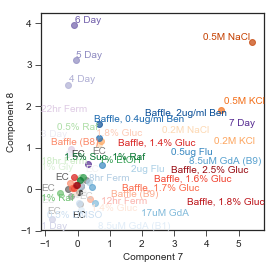

In [106]:
all_bcs = list(dataset['training_bcs']) +  list(dataset['testing_bcs'])
all_bcs = sorted(all_bcs)

these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols)
model = 7

these_bcs = all_bcs
these_indices = range(len(all_bcs))

all_genes = np.unique(this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values)
annotation_genes = all_genes

annotation_genes = ['GPB2','GPB1','IRA1_nonsense','IRA1_missense','PDE2','Diploid','Diploid_adaptive','RAS2']
annotation_genes = [gene for gene in annotation_genes if gene in all_genes]

cond_locs = dataset['cond_locs'][model][range(len(these_cols)),:]

these_bcs = all_bcs

for x,y in combinations(range(8),2):

    plt.figure(figsize=(4,4))

    ts = []
    for c,cond in enumerate(these_cols):
        mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
        plt.scatter(cond_locs[c, x], cond_locs[c, y],color=condition_colorset[cond.replace('_fitness','')],alpha=0.7)
        ts.append(plt.text(cond_locs[c, x], cond_locs[c, y], color=condition_colorset[cond.replace('_fitness','')],s=renamed_conditions[cond.replace('_fitness','')],ha='center'))
        #     plt.scatter(avg_mutant_fitness,these_locs[c,0],color=condition_colorset[cond.replace('_fitness','')])

    plt.xlabel(f'Component {x+1}')
    plt.ylabel(f'Component {y+1}')

    plt.savefig(f'space_plotted/space_plotted_allconditions_{x+1}_{y+1}.pdf',bbox_inches='tight')
    
    adjust_text(ts, x=cond_locs[:, x], y=cond_locs[:, y], force_points=(0.5,0.5),ha='center')
    plt.savefig(f'space_plotted/space_plotted_allconditions_annotate_{x+1}_{y+1}.pdf',bbox_inches='tight')


[[ 1.       -0.999933]
 [-0.999933  1.      ]]
[[ 1.         -0.98848882]
 [-0.98848882  1.        ]]


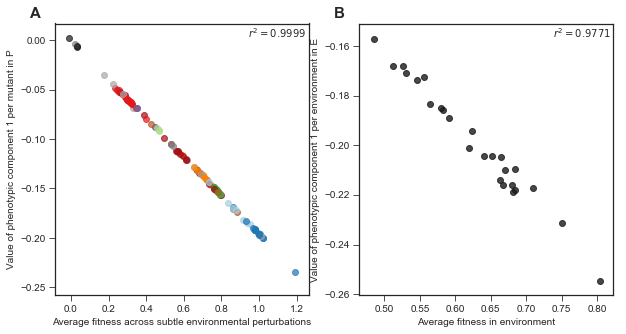

In [33]:
# dataset = datasets['subtle_to_strong_NEWSET']

# first component is mean fitness
these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
these_locs = dataset['mut_locs'][model][these_indices,:]

these_bcs = all_bcs

# trans = umap.UMAP(neighbors).fit(these_locs)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.text(s='A',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=plt.gca().transAxes)
f_list = []
loc_list = []
for b,bc in enumerate(these_bcs):
    mean_subtle_fitness = np.mean(this_data[this_data['barcode']==bc][these_cols].values)
    mutant_type = mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
    plt.scatter(mean_subtle_fitness, these_locs[b,0], color=tools.mutant_colorset[mutant_type],alpha=0.7)
    
    f_list.append(mean_subtle_fitness)
    loc_list.append(these_locs[b,0])
plt.xlabel('Average fitness across subtle environmental perturbations')
plt.ylabel('Value of phenotypic component 1 per mutant in P')
print(np.corrcoef(f_list,loc_list))
plt.text(s=rf'$r^2 = {np.corrcoef(f_list,loc_list)[0,1]**2:.4f}$',x=0.99,y=0.99,va='top',ha='right',transform=plt.gca().transAxes)

# for b,bc in enumerate(these_bcs):
#     mean_subtle_fitness = np.mean(this_data[this_data['barcode']==bc][list(sorted_m3_cols) ].values)
#     mutant_type =this_data[this_data['barcode']==bc]['mutation_type'].values[0]
#     plt.scatter(mean_subtle_fitness, these_locs[b,0], color=tools.mutant_colorset[mutant_type],alpha=0.7)
# plt.xlabel('Average Fitness across EC batches')
# plt.ylabel('Phenotypic Component 1')

cond_locs = dataset['cond_locs'][model][range(len(these_cols)),:]
plt.subplot(1,2,2)
plt.text(s='B',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=plt.gca().transAxes)
f_list = []
loc_list = []
for c,cond in enumerate(these_cols):
    avg_mutant_fitness = np.mean(this_data[this_data['barcode'].isin(these_bcs)][cond].values)
    plt.scatter(avg_mutant_fitness,cond_locs[c,0],color='k',alpha=0.8)
    
    f_list.append(avg_mutant_fitness)
    loc_list.append(cond_locs[c,0])
#     plt.scatter(avg_mutant_fitness,these_locs[c,0],color=condition_colorset[cond.replace('_fitness','')])

plt.xlabel('Average fitness in environment')
plt.ylabel('Value of phenotypic component 1 per environment in E')
plt.text(s=rf'$r^2 = {np.corrcoef(f_list,loc_list)[0,1]**2:.4f}$',x=0.99,y=0.99,va='top',ha='right',transform=plt.gca().transAxes)
# plt.annotate(s=,xy=(0.5,0.5),ha='right')
print(np.corrcoef(f_list,loc_list))

plt.savefig('figureS2.pdf',bbox_inches='tight')

In [41]:
print('Variance Explained')
print((s**2/np.sum(s**2))[:8])
print('Total VE by the model')
print(np.sum((s**2/np.sum(s**2))[:8]))
# print('')
# print(np.sum(((s**2/np.sum(s**2))[1:max_d]/np.sum((s**2/np.sum(s**2))[1:]))[:4]))
print('Percent of Additional VE explained')
print((s**2/np.sum(s**2))[1:max_d]/np.sum((s**2/np.sum(s**2))[1:]))

Variance Explained
[9.51987519e-01 3.25153763e-02 4.01997870e-03 2.69164165e-03
 2.52413151e-03 9.33610385e-04 8.97514416e-04 8.00706786e-04]
Total VE by the model
0.9963704787847277
Percent of Additional VE explained
[0.67722758 0.08372779 0.05606129 0.0525724  0.01944516 0.01869336
 0.01667705]


In [43]:
#### LEAVE ONE OUT ANALYSIS

subtle_conditions = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
strong_conditions = list(sorted_nonm3_cols[first_nonsubtle:])

training_bcs = minimal_training_bcs
testing_bcs = minimal_testing_bcs

leave_one_out_output = tools.leave_one_out_analysis(this_data,subtle_conditions,strong_conditions,training_bcs,testing_bcs,weighted=True)

[0.85879213 0.92622402 0.93721476 0.94541535 0.95096253 0.95432784
 0.9540273  0.95609482 0.96249464 0.96283603 0.96127291 0.96208452
 0.96016609 0.96343141 0.96094142 0.96035984 0.96085528 0.96071648
 0.96002559 0.95910426 0.96036608 0.9540811  0.9524049  0.95441325]


Text(15,0.905,'Average')

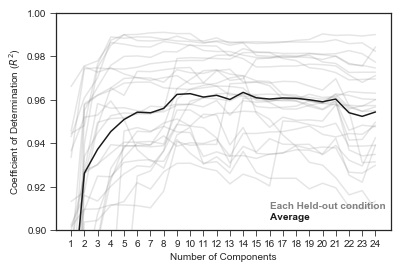

In [46]:
total = np.zeros(24)
maxes = []
for left_out_index in range(len(subtle_conditions)):
    this_output = np.asarray(leave_one_out_output[0][subtle_conditions[left_out_index]]).swapaxes(0,1)[:][0]
    total = total + this_output
    maxes.append(np.where(this_output==max(this_output))[0][0])
    plt.plot(range(24),np.asarray(leave_one_out_output[0][subtle_conditions[left_out_index]]).swapaxes(0,1)[:][0],color='gray',alpha=0.2)
    
plt.plot(range(24),total/len(subtle_conditions),'k')
# plt.axvline(np.where(total==max(total))[0][0],color='r')
print(total/len(subtle_conditions))
# plt.text(x=np.where(total==max(total))[0][0]+0.2,y=0.7,s='Average Best\nNumber of Components',color='r')

plt.xticks(range(24),range(1,25))

# plt.ylabel(r'Weighted Coefficient of Determination ($\widetilde R^2$)')
plt.ylabel(r'Coefficient of Determination ($R^2$)')
plt.xlabel('Number of Components')

plt.ylim(0.9,1.0)
plt.text(x=15,y=0.91,s='Each Held-out condition',color='gray',weight='semibold')
plt.text(x=15,y=0.905,s='Average',color='k',weight='semibold')


# plt.figure()
# sns.distplot(maxes,bins=range(15),kde=False)

# dataset['CV_best_rank_index_weighted']
# plt.savefig(f'leave_one_out_NEWSET_biCV_unweighted_ylim.pdf',bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


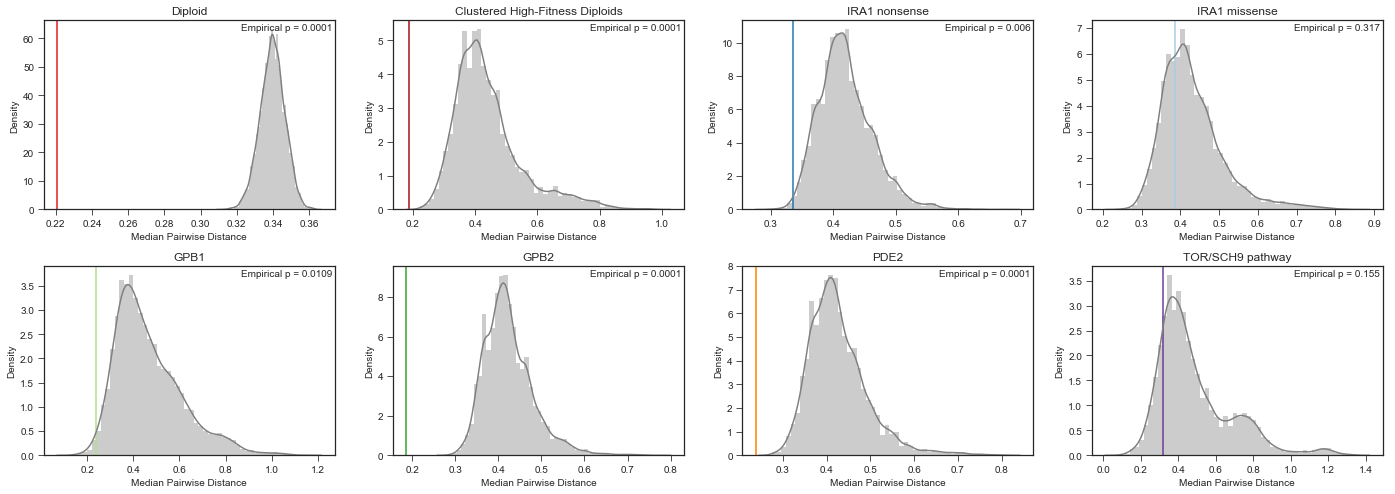

In [60]:
starting_index = 1
model = 7
dataset = datasets['subtle_to_strong_NEWSET']
all_bcs = list(dataset['training_bcs']) +  list(dataset['testing_bcs'])
all_bcs = sorted(all_bcs)
n_perms  = 10000
np.random.seed(94305) # for exact figure match

mutant_sets = {'Diploid':['Diploid'],
                      'Clustered High-Fitness Diploids':['list not needed'],
#                        'IRA1':['IRA1_nonsense','IRA1_missense'],
                        'IRA1_nonsense':['IRA1_nonsense'],
                        'IRA1_missense':['IRA1_missense'],
                        'GPB1':['GPB1'],
                        'GPB2':['GPB2'],
                        'PDE2':['PDE2'],
                        'TOR/SCH9 pathway':['TOR1','SCH9','KOG1'],
#                         'CYR1':['CYR1'],
               
                        }
# mutant_comparisons = {'Diploid':'all',
#                       'Diploid_adaptive':'all',
#                         'IRA1_nonsense':'all',
#                         'IRA1_missense':'all',
#                         'GPB2':'all',
#                         'PDE2':'all'}

fig = plt.figure(figsize=(6*np.ceil(len(mutant_sets)/2),4*2))
for m, mutant_type in enumerate(mutant_sets):
    
    plt.subplot(2,np.ceil(len(mutant_sets)/2),m+1)
    these_indices = []
    these_bcs = []
    non_diploid_indices = []
#     comparison_bcs = []
    for b,bc in enumerate(all_bcs):
        if mutant_type == 'Clustered High-Fitness Diploids':
            if bc in clusterd_hfD:
                these_indices.append(b)
                these_bcs.append(bc)
        
        elif this_data[this_data['barcode']==bc]['mutation_type'].values[0]in (mutant_sets[mutant_type]):
            these_indices.append(b)
            these_bcs.append(bc)
        if this_data[this_data['barcode']==bc]['mutation_type'].values[0] != 'Diploid':
            non_diploid_indices.append(b)
    
    these_locs = dataset['mut_locs'][model][these_indices,:][:,starting_index:]
    these_dists = distance.pdist(these_locs)
    actual_median = np.median(these_dists) 
        
    
    perm_medians = []
    for perm in range(n_perms):
        ## BYPASSES THE NON DIPLOID THING
        perm_indices = np.random.choice(range(len(all_bcs)),len(these_bcs),replace=False)
        
        if mutant_type != 'Diploid':
            perm_indices = np.random.choice(non_diploid_indices,len(these_bcs),replace=False)
        else:
            perm_indices = np.random.choice(range(len(all_bcs)),len(these_bcs),replace=False)        
        
        perm_locs = dataset['mut_locs'][model][perm_indices,:][:,starting_index:]
        perm_dists = distance.pdist(perm_locs)
        perm_medians.append(np.median(perm_dists))
        
        
#     actual_median = np.median(these_dists)   

    if mutant_type == 'Clustered High-Fitness Diploids':
        plt.axvline(actual_median,color=mutant_colorset['Diploid_adaptive'])
#         sns.distplot(these_dists,color=mutant_colorset['Diploid_adaptive'])
    elif mutant_type == 'IRA1':
        plt.axvline(actual_median,color=mutant_colorset['IRA1_nonsense'])
#         sns.distplot(these_dists,color=mutant_colorset['IRA1_nonsense'])
    elif mutant_type == 'TOR/SCH9 pathway' or mutant_type == 'Tor/SCH9 pathway':
        plt.axvline(actual_median,color=mutant_colorset['TOR1'])
#         sns.distplot(these_dists,color=mutant_colorset['TOR1'])
    else:
        plt.axvline(actual_median,color=mutant_colorset[mutant_type])
#         sns.distplot(these_dists,color=mutant_colorset[mutant_type])
    sns.distplot(perm_medians,color='gray')
    r = np.sum(actual_median>=perm_medians)
    plt.text(s=f'Empirical p = {(r+1)/(n_perms+1):.3g}',x=0.99,y=0.95,ha='right',transform=plt.gca().transAxes)
    plt.xlabel('Median Pairwise Distance')
    plt.ylabel('Density')
    plt.title(mutant_type.replace('_',' '))

#     plt.figure()
fig.subplots_adjust(hspace=0.3)
# plt.savefig(f'gene_distance_NEW_MORE_permuted_{starting_index+1}-{model+1}.pdf',bbox_inches='tight')
    
    

(124, 3)


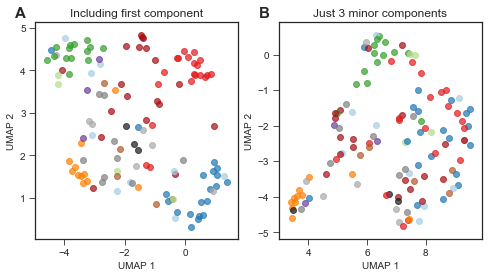

In [52]:
plt.figure(figsize=(8,4))

ax = plt.subplot(121)
plt.text(s='A',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=ax.transAxes)
np.random.seed(94305) # for exact figure match
dataset = datasets['subtle_to_strong_NEWSET_fewer_diploids']
neighbors = 20



all_bcs = list(dataset['training_bcs']) +  list(dataset['testing_bcs'])
all_bcs = sorted(all_bcs)

these_bcs = all_bcs
these_indices = range(len(all_bcs))

all_genes = np.unique(this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values)
annotation_genes = all_genes

annotation_genes = ['GPB2','GPB1','IRA1_nonsense','IRA1_missense','PDE2','Diploid','Diploid_adaptive','RAS2']
annotation_genes = [gene for gene in annotation_genes if gene in all_genes]

offset = 0
model = 7
# ax = plt.subplot(122)
these_locs = dataset['mut_locs'][model][these_indices,offset:]

these_bcs = all_bcs

trans = umap.UMAP(neighbors).fit(these_locs)

for b,bc in enumerate(these_bcs):
    mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
    plt.scatter(trans.embedding_[b, 0], trans.embedding_[b, 1], color=tools.mutant_colorset[mutant_type],alpha=0.7)
    
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# ts = []
# for gene in annotation_genes:
#     these_bcs = this_data[this_data['mutation_type']==gene]['barcode'].values
#     ix = np.where(np.isin(all_bcs,these_bcs))[0]
#     mean_loc =  np.mean(trans.embedding_[ix,:],axis=0)
#     mean_loc = tools.geometric_median(trans.embedding_[ix,:])
#     ts.append(plt.text(mean_loc[0], mean_loc[1], color=mutant_colorset[gene],s=gene.replace('_','\n'),ha='center'))
# adjust_text(ts, x=trans.embedding_[:, 0], y=trans.embedding_[:, 1], force_points=(0.5,0.5),ha='center')

# plt.figure(figsize=(8,4))

plt.title('Including first component')

ax = plt.subplot(122)
plt.text(s='B',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=ax.transAxes)
np.random.seed(94305) # for exact figure match
dataset = datasets['subtle_to_strong_NEWSET_fewer_diploids']
neighbors = 20



all_bcs = list(dataset['training_bcs']) +  list(dataset['testing_bcs'])
all_bcs = sorted(all_bcs)

these_bcs = all_bcs
these_indices = range(len(all_bcs))

all_genes = np.unique(this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values)
annotation_genes = all_genes

annotation_genes = ['GPB2','GPB1','IRA1_nonsense','IRA1_missense','PDE2','Diploid','Diploid_adaptive','RAS2']
annotation_genes = [gene for gene in annotation_genes if gene in all_genes]

offset = 5
model = 7
# ax = plt.subplot(122)
these_locs = dataset['mut_locs'][model][these_indices,offset:]
print(these_locs.shape)
these_bcs = all_bcs

trans = umap.UMAP(neighbors).fit(these_locs)

for b,bc in enumerate(these_bcs):
    mutant_type = this_data[this_data['barcode']==bc]['mutation_type'].values[0]
    plt.scatter(trans.embedding_[b, 0], trans.embedding_[b, 1], color=tools.mutant_colorset[mutant_type],alpha=0.7)
    
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.title('Just 3 minor components')
plt.savefig('FigureS3.pdf',bbox_inches='tight')
# ts = []
# for gene in annotation_genes:
#     these_bcs = this_data[this_data['mutation_type']==gene]['barcode'].values
#     ix = np.where(np.isin(all_bcs,these_bcs))[0]
#     mean_loc =  np.mean(trans.embedding_[ix,:],axis=0)
#     mean_loc = tools.geometric_median(trans.embedding_[ix,:])
#     ts.append(plt.text(mean_loc[0], mean_loc[1], color=mutant_colorset[gene],s=gene.replace('_','\n'),ha='center'))
# adjust_text(ts, x=trans.embedding_[:, 0], y=trans.embedding_[:, 1], force_points=(0.5,0.5),ha='center')




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


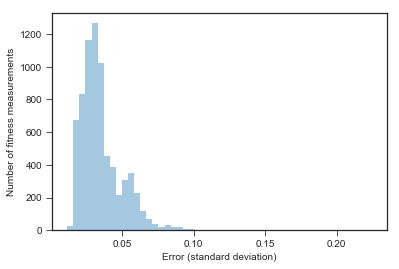

In [88]:
these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])

this_fitness = this_data[this_data['barcode'].isin(list(minimal_training_bcs)+list(minimal_testing_bcs))][these_cols].values
this_err = this_data[this_data['barcode'].isin(list(minimal_training_bcs)+list(minimal_testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values

# plt.figure(figsize=(2*6,2*6))
# for col in range(len(these_cols)):
#     plt.subplot(5,5,col+1)
#     sns.distplot(this_err[:,col],hist=False,color=condition_colorset[these_cols[col].replace('_fitness','')])
#     plt.xlim(0,0.2)
    
plt.figure()
sns.distplot(tools.flatten(this_err),norm_hist=False,kde=False)

plt.xlabel('Error (standard deviation)')
plt.ylabel('Number of fitness measurements')
plt.savefig('old_figures/noise_distribution.pdf')

In [89]:
np.mean(this_err)

0.03545422094345624

0.03545422094345624
1.1645141147129514
0.0006886111243475537
0.0008007067855557588 0.0005558530806509072 0.6942030349662864
8
0.0443177761793203
1.445023683271258
0.0010603138901578205
0.0025241315098057586 0.0009336103847402907 0.3698739075651948
5
0.05318133141518436
1.7399308996789278
0.00153726423188362
0.0025241315098057586 0.0009336103847402907 0.3698739075651948
5
0.06204488665104842
2.0299984503963553
0.0020925504311687113
0.0025241315098057586 0.0009336103847402907 0.3698739075651948
5
0.07090844188691248
2.332086796728437
0.0027616837275169412
0.004019978702287463 0.0026916416493320446 0.6695661466565573
3


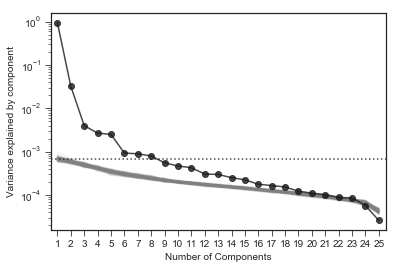

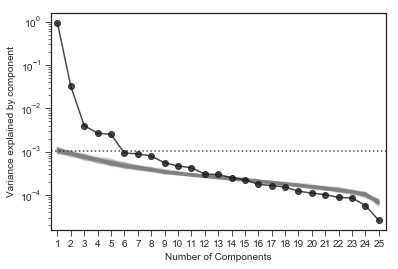

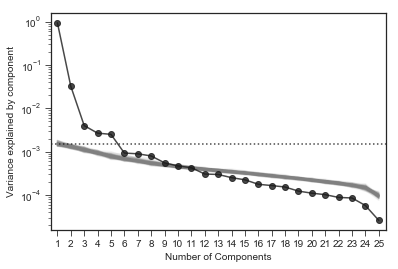

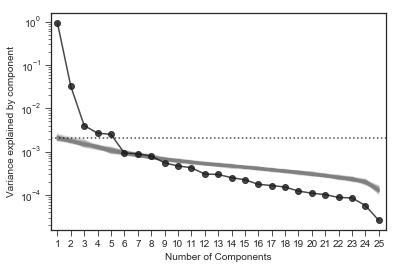

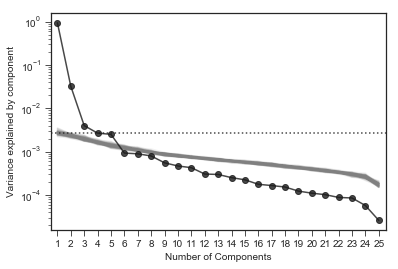

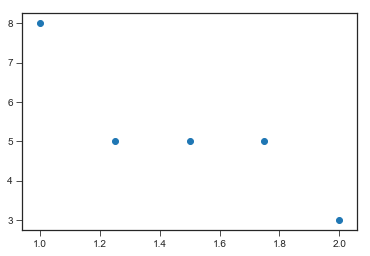

In [90]:
### SIMULATE MORE ERROR

these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])

this_fitness = this_data[this_data['barcode'].isin(list(minimal_training_bcs)+list(minimal_testing_bcs))][these_cols].values
this_err = this_data[this_data['barcode'].isin(list(minimal_training_bcs)+list(minimal_testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values


error_names = ['Our Measurement Error','10% Increase','50% Increase','2-fold Increase']

# # reduce = [1,1.1,1.5,2.0,5.0,10.0]
# # error_names = ['Our Measurement Error','10% Increase','50% Increase','2-fold Increase','5-fold Increase','10-fold Increase']

# plt.figure(figsize=(4*2,4*2))
# for r,err_reduction in enumerate(reduce):
#     ax = plt.subplot(2,2,r+1)
    
#     this_err_fake = err_reduction*this_err
#     print(np.mean(this_err_fake))
#     this_fitness_fake = np.random.normal(this_fitness,this_err_fake)
    
#     plt.title(error_names[r])
#     graphs.svd_noise_comparison_figure(ax,this_fitness_fake,this_err_fake,100,annotate=False)
#     plt.text(s=f'{chr(65+r)}',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=plt.gca().transAxes)
#     plt.yscale('log')
# plt.tight_layout()
# plt.savefig('importance_of_measurement_error_2x2.pdf',bbox_inches='tight')

reduce = np.linspace(1,5,41)
reduce = np.linspace(1,2,5)

detections = []

# new_this_fitness = np.random.normal(this_fitness,this_err_fake)

for r,err_reduction in enumerate(reduce):
    this_err_fake = err_reduction*this_err
    print(np.mean(this_err_fake))
    this_fitness_fake = np.random.normal(this_fitness,this_err_fake)
    ax = plt.figure()
    out = graphs.svd_noise_comparison_figure(ax,this_fitness,this_err_fake,100,annotate=False,output=True)
    plt.yscale('log')
    detections.append(out[1])
plt.figure()
plt.scatter(reduce,detections)


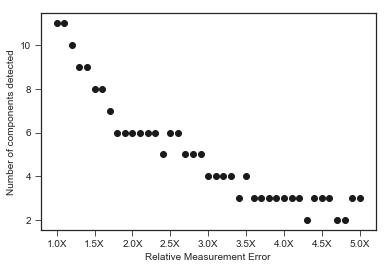

In [41]:
plt.scatter(reduce,detections,color='k')
plt.ylabel('Number of components detected')
plt.xlabel('Relative Measurement Error')
plt.xticks(np.linspace(1,5,9),[f'{i}X' for i in np.linspace(1,5,9)])
# plt.savefig('more_noise_detection.pdf',bbox_inches='tight')

In [53]:
#### LEAVE ONE OUT ANALYSIS


subtle_conditions = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
strong_conditions = list(sorted_nonm3_cols[first_nonsubtle:])

training_bcs = minimal_training_bcs
testing_bcs = minimal_testing_bcs

leave_one_out_output = tools.leave_one_out_analysis(this_data,subtle_conditions,strong_conditions,training_bcs,testing_bcs,weighted=True)

In [42]:
gene_label_key = {'Diploid':['Diploid'],
                 'High-fitness Diploid':['Diploid_adaptive','Diploid + Chr11Amp','Diploid + Chr12Amp','Diploid + IRA1','Diploid + IRA2'],
                  'IRA1 nonsense':['IRA1_nonsense'],
                  'IRA1 missense':['IRA1_missense'],
                  'IRA2':['IRA2'],
                  'GPB1':['GPB1'],
                  'GPB2':['GPB2'],
                  'PDE2':['PDE2'],
                  'Other RAS/PKA pathway':['RAS2','CYR1','TFS1'],
                  'TOR/SCH9 pathway':['KOG1','TOR1','SCH9'],
                  'Other adaptive':['other_adaptive']
                 }
gene_label_key = {'Diploid':['Diploid'],
                 "Diploid w/ add'l mutation":['Diploid_adaptive','Diploid + Chr11Amp','Diploid + Chr12Amp','Diploid + IRA1','Diploid + IRA2'],
                  '$\\bf{IRA1}$ $\\bf{nonsense}$':['IRA1_nonsense'],
                  '$\\bf{IRA1}$ $\\bf{missense}$':['IRA1_missense'],
                  '$\\bf{IRA2}$':['IRA2'],
                  '$\\bf{GPB1}$':['GPB1'],
                  '$\\bf{GPB2}$':['GPB2'],
                  '$\\bf{PDE2}$':['PDE2'],
                  'Other RAS/PKA pathway':['RAS2','CYR1','TFS1'],
                  'TOR/SCH9 pathway':['KOG1','TOR1','SCH9'],
                  'Other adaptive':['other_adaptive']
                 }
                 gene_label_key = {'Neutral':['ExpNeutral'],
                 'Diploid':['Diploid'],
                 "Diploid w/ add'l mutation":['Diploid_adaptive','Diploid + Chr11Amp','Diploid + Chr12Amp','Diploid + IRA1','Diploid + IRA2'],
                  '$\\bf{IRA1}$ $\\bf{nonsense}$':['IRA1_nonsense'],
                  '$\\bf{IRA1}$ $\\bf{missense}$':['IRA1_missense'],
                  '$\\bf{IRA2}$':['IRA2'],
                  '$\\bf{GPB1}$':['GPB1'],
                  '$\\bf{GPB2}$':['GPB2'],
                  '$\\bf{PDE2}$':['PDE2'],
                  'Other RAS/PKA pathway':['RAS2','CYR1','TFS1'],
                  'TOR/SCH9 pathway':['KOG1','TOR1','SCH9'],
                  'Other adaptive':['other_adaptive']
                 }

7
[0.69820309 0.7856507  0.89992535 0.94172001 0.73288997 0.77356837
 0.77250404 0.77420121 0.51136262 0.56958557 0.40536336 0.57920881
 0.57703003 0.60755623 0.5732972  0.78099904 0.46150853 0.29441909
 0.73841657 0.71916141]
4
[0.71930523 0.76881335 0.85918863 0.94651536 0.60220808 0.71104398
 0.74035206 0.6581091  0.47813296 0.44930784 0.29874081 0.43362445
 0.44056439 0.51814072 0.50333098 0.70468716 0.24601423 0.25496773
 0.63798559 0.56031197]
[-0.0302235   0.0214311   0.04526677 -0.00509212  0.17831038  0.08082593
  0.04162046  0.14995083  0.06498257  0.2111671   0.26302956  0.25135039
  0.23649659  0.14717239  0.12204179  0.0977106   0.4669346   0.13399731
  0.13600856  0.22088148]
0.1416931398471428
7
[0.50010998 0.73327434 0.86376913 0.8914748  0.57678577 0.66028646
 0.65930178 0.68228894 0.44271984 0.28342367 0.13235837 0.57681418
 0.58218303 0.69338139 0.57297793 0.81339668 0.17403093 0.50316185
 0.76751286 0.75115271]
4
[0.48364068 0.73807613 0.79790469 0.89747938 0.621893

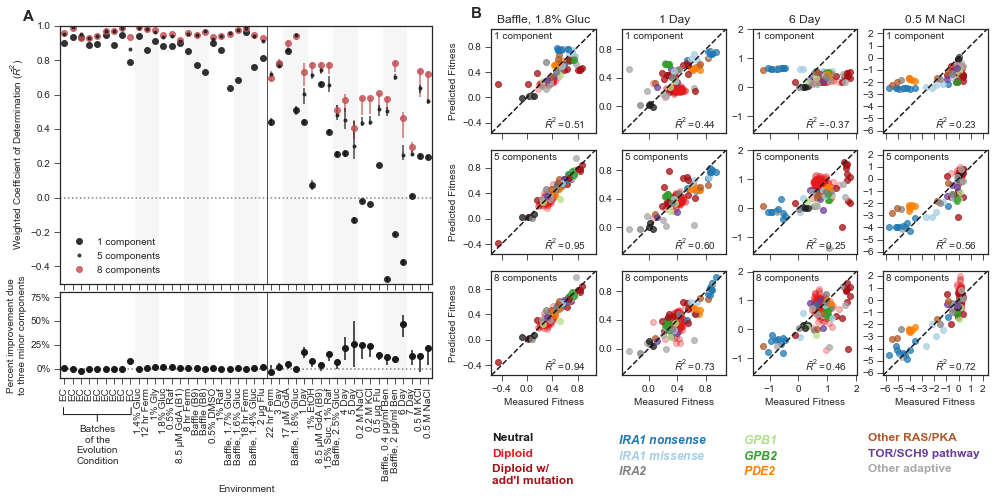

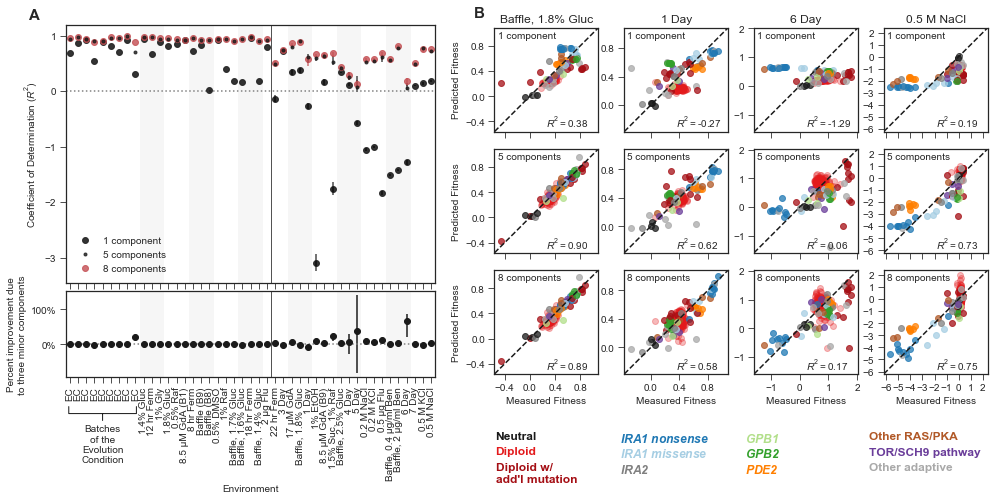

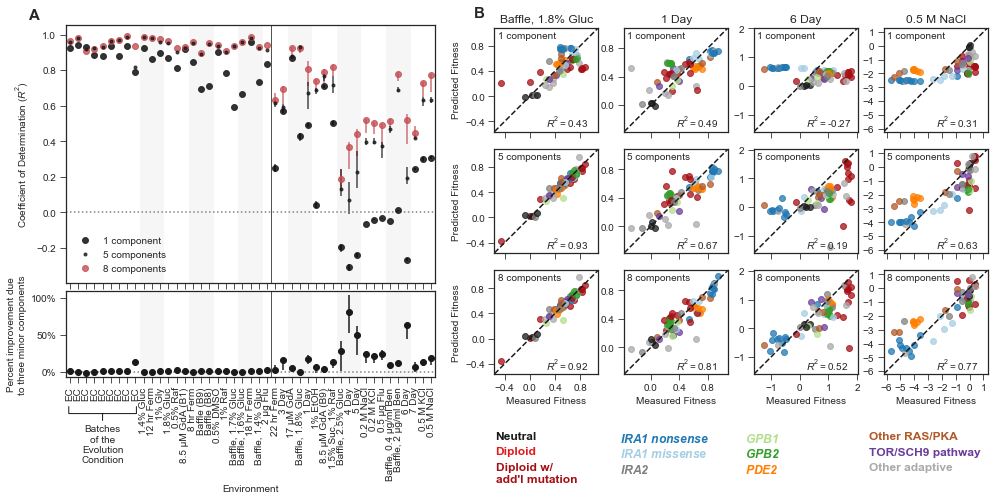

In [49]:
example_names = ['1.8%','Resp_24hr_Transfer','1BB_1%EtOH','Ben2','1BB_0.5MNaCl']
# graphs.Figure4_w_examples(datasets['batch_to_nonbatch_wothers_fixed_mutants'],gene_list,this_data,[col + '_fitness' for col in example_names],model=4)
interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness','Resp_4Day_Transfer_fitness', '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
example_names = ['1.8%','Resp_24hr_Transfer','1BB_SucRaf','2.5%','Resp_4Day_Transfer', '1BB_0.5ugFlu','Resp_6Day_Transfer','1BB_0.5MNaCl']
example_names = ['1.8%','Resp_24hr_Transfer','Resp_6Day_Transfer','1BB_0.5MNaCl']

### Default figure for the paper (weighted R^2 with all mutants)
graphs.Figure4_leaveout_w_examples(datasets['subtle_to_strong_NEWSET'],gene_list,this_data,[col + '_fitness' for col in example_names],models=[4,7],weighted=True,labels=True,subtle=True,permute=False)
plt.savefig('figure4.pdf',bbox_inches='tight')

### Showing with 1st, 2nd, full model (weighted R^2 with all mutants)
# graphs.Figure4_leaveout_w_examples(datasets['subtle_to_strong_NEWSET'],gene_list,this_data,[col + '_fitness' for col in example_names],models=[1,7],weighted=True,labels=True,subtle=True,permute=False)
# plt.savefig('figure4_fullmodel+ebars_128.pdf',bbox_inches='tight')

### Unweighted R^2 with all mutants 
graphs.Figure4_leaveout_w_examples(datasets['subtle_to_strong_NEWSET'],gene_list,this_data,[col + '_fitness' for col in example_names],models=[4,7],weighted=False,labels=True,subtle=True,permute=False,ylim_adjust=True)
plt.savefig('figureS5A.pdf',bbox_inches='tight')

### Unweighted R^2 with all non-diploids
graphs.Figure4_leaveout_w_examples(datasets['subtle_to_strong_NEWSET_fewer_diploids'],gene_list,this_data,[col + '_fitness' for col in example_names],models=[4,7],weighted=False,labels=True,subtle=True,permute=False,ylim_adjust=True)
plt.savefig('figureS5B.pdf',bbox_inches='tight')

In [34]:
## contribution of 2nd component to predictive power

dataset = datasets['subtle_to_strong_NEWSET']
guesses = dataset['guesses']
both_new = dataset['both_new']

# left_out_fits = tools.leave_one_out_analysis(this_data,datasets['subtle_to_strong_NEWSET']['train_conditions'],datasets['subtle_to_strong_NEWSET']['test_conditions'],
#                                              datasets['subtle_to_strong_NEWSET']['training_bcs'],datasets['subtle_to_strong_NEWSET']['testing_bcs'],weighted=True)
# left_out_fits = left_out_fits[0]

types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values
model2 = np.asarray([tools.var_explained_weighted_by_type(both_new[:,i],guesses[1][:,i],types)[0] for i in range(both_new.shape[1])])
model8 = np.asarray([tools.var_explained_weighted_by_type(both_new[:,i],guesses[7][:,i],types)[0] for i in range(both_new.shape[1])])
print('Average Predictive Fraction:',np.mean(model2/model8))
model2/model8

Average Predictive Fraction: 0.8559298539707785


array([1.02249407, 0.98247456, 0.90241167, 0.90918516, 0.52628634,
       0.7665598 , 0.94755425, 0.65955371, 0.75520948, 0.88745388,
       1.05423381, 0.71208011, 0.73963326, 0.82410418, 0.93320075,
       0.91211652, 0.65531948, 1.16972229, 0.90055267, 0.85845109])

In [ ]:
example_names = ['1.8%','Resp_24hr_Transfer','1BB_1%EtOH','Ben2','1BB_0.5MNaCl']
# graphs.Figure4_w_examples(datasets['batch_to_nonbatch_wothers_fixed_mutants'],gene_list,this_data,[col + '_fitness' for col in example_names],model=4)
interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness','Resp_4Day_Transfer_fitness', '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
example_names = ['1.8%','Resp_24hr_Transfer','1BB_SucRaf','2.5%','Resp_4Day_Transfer', '1BB_0.5ugFlu','Resp_6Day_Transfer','1BB_0.5MNaCl']
example_names = ['1.8%','Resp_24hr_Transfer','Resp_6Day_Transfer','1BB_0.5MNaCl']


graphs.Figure4_leaveout_w_examples(datasets['subtle_to_strong_NEWSET'],gene_list,this_data,[col + '_fitness' for col in example_names],models=[4,7],weighted=False,labels=True,subtle=True,permute=False)
plt.savefig('figure4_NEWSET_percentimprovement_alphashift_with_ratios_unweighted_subtleincluded_leave1out_ebars_vertswap_8th.pdf',bbox_inches='tight')

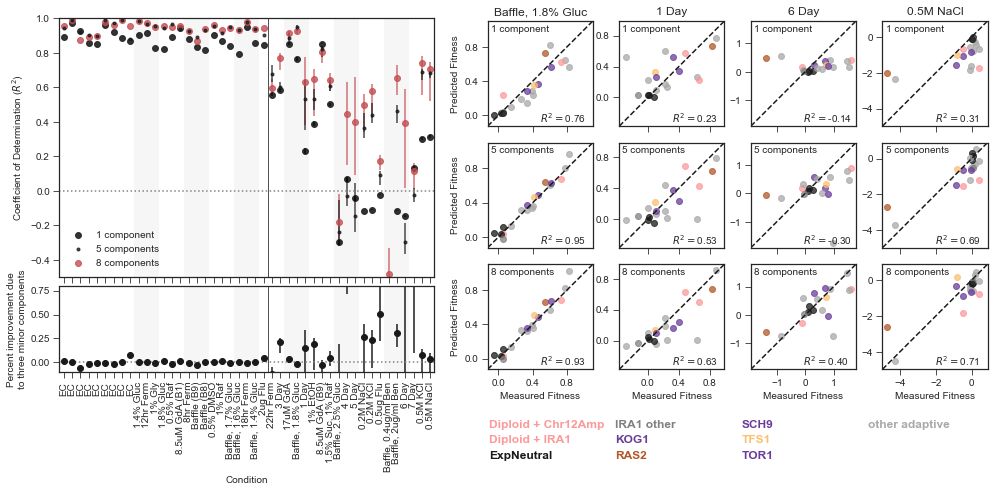

In [27]:
example_names = ['1.8%','Resp_24hr_Transfer','1BB_1%EtOH','Ben2','1BB_0.5MNaCl']
# graphs.Figure4_w_examples(datasets['batch_to_nonbatch_wothers_fixed_mutants'],gene_list,this_data,[col + '_fitness' for col in example_names],model=4)
interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness','Resp_4Day_Transfer_fitness', '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
example_names = ['1.8%','Resp_24hr_Transfer','1BB_SucRaf','2.5%','Resp_4Day_Transfer', '1BB_0.5ugFlu','Resp_6Day_Transfer','1BB_0.5MNaCl']
example_names = ['1.8%','Resp_24hr_Transfer','Resp_6Day_Transfer','1BB_0.5MNaCl']


graphs.Figure4_leaveout_w_examples(datasets['subtle_to_strong_NEWSET_testingonly'],gene_list,this_data,[col + '_fitness' for col in example_names],models=[4,7],weighted=False,labels=True,subtle=True,permute=False)
plt.savefig('figure4_NEWSET_testingonly_percentimprovement_alphashift_with_ratios.pdf',bbox_inches='tight')

1 0.10797563147804246
2 0.7117983339577403
3 0.7404410202662184
4 0.7371156924683387
5 0.7336086153686981
6 0.7413533988535839
7 0.7422848756308342
8 0.7491986914562223
1 0.10797563147804246
2 0.7117983339577403
3 0.7404410202662184
4 0.7371156924683387
5 0.7336086153686981
6 0.7413533988535839
7 0.7422848756308342
8 0.7491986914562223
1 0.10797563147804246
2 0.7117983339577403
3 0.7404410202662184
4 0.7371156924683387
5 0.7336086153686981
6 0.7413533988535839
7 0.7422848756308342
8 0.7491986914562223
1 0.10797563147804246
2 0.7117983339577403
3 0.7404410202662184
4 0.7371156924683387
5 0.7336086153686981
6 0.7413533988535839
7 0.7422848756308342
8 0.7491986914562223
1 0.10797563147804246
2 0.7117983339577403
3 0.7404410202662184
4 0.7371156924683387
5 0.7336086153686981
6 0.7413533988535839
7 0.7422848756308342
8 0.7491986914562223
1 0.10797563147804246
2 0.7117983339577403
3 0.7404410202662184
4 0.7371156924683387
5 0.7336086153686981
6 0.7413533988535839
7 0.7422848756308342
8 0.749

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


6 0.7413533988535839
7 0.7422848756308342
['GPB2', 'Diploid + Chr11Amp', 'Diploid + IRA1', 'CYR1', 'IRA1 missense', 'PDE2', 'TOR/Sch9 Pathway', 'Diploid + Chr12Amp', 'TFS1', 'IRA1 nonsense', 'RAS2', 'IRA2', 'Diploid', 'High-fitness Diploid', 'Diploid + IRA2', 'GPB1', 'SSK2']
7 0.7422848756308342
8 0.7491986914562223
7 0.7422848756308342
8 0.7491986914562223
7 0.7422848756308342
8 0.7491986914562223
['GPB2', 'Diploid + Chr11Amp', 'Diploid + IRA1', 'CYR1', 'IRA1 missense', 'PDE2', 'TOR/Sch9 Pathway', 'Diploid + Chr12Amp', 'TFS1', 'IRA1 nonsense', 'RAS2', 'IRA2', 'Diploid', 'High-fitness Diploid', 'Diploid + IRA2', 'GPB1', 'SSK2']


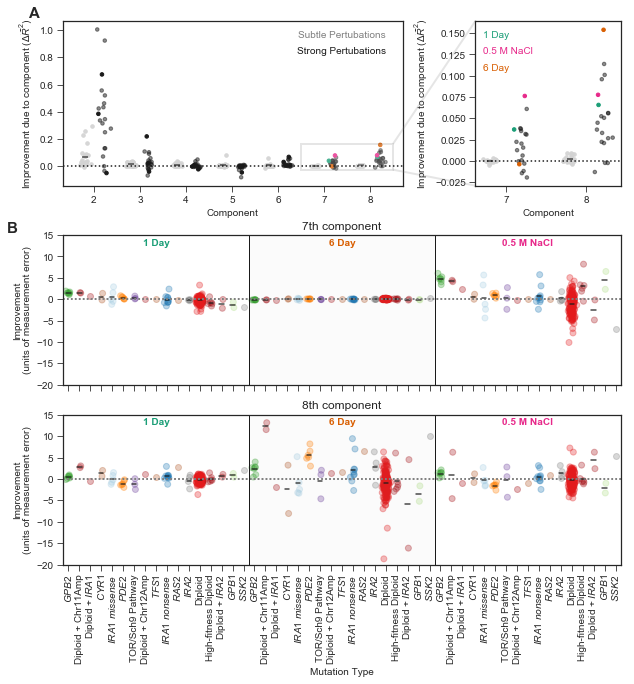

In [52]:
trying_colors= ["#e41a1c","#377eb8","#4daf4a","#984ea3"]
trying_colors = ["#66c2a5","#fc8d62","#e78ac3","#8da0cb"]
trying_colors = ["#1b9e77","#d95f02","#e7298a","#7570b3"]

models = [
    (7,[list(range(6)),list(range(7))],['Resp_24hr_Transfer_fitness','Resp_6Day_Transfer_fitness','1BB_0.5MNaCl_fitness']),
    (8,[list(range(7)),list(range(8))],['Resp_24hr_Transfer_fitness','Resp_6Day_Transfer_fitness','1BB_0.5MNaCl_fitness'])

]

focal_conditions = {
                    'Resp_24hr_Transfer_fitness':([7,8],trying_colors[0]),
                    '1BB_0.5MNaCl_fitness':([7,8],trying_colors[2]),
                    'Resp_6Day_Transfer_fitness':([7,8],trying_colors[1])
                   }

fig,return_diffs = graphs.Figure5_new(datasets['subtle_to_strong_NEWSET'],datasets['subtle_to_strong_NEWSET'],this_data,
               models,focal_conditions,full_model=range(8))
plt.savefig('figure5.pdf',bbox_inches='tight')

In [ ]:
gene_labels = 


{'GPB2':'$\it{GPB2}$',
 'Diploid + Chr11Amp':'Diploid + Chr11Amp',
 'Diploid + IRA1':'Diploid + $\it{IRA1}$',
 'CYR1':'$\it{CYR1}$',
 'IRA1 missense':'$\it{IRA1}$ $\it{missense}',
 'PDE2':'$\it{PDE2}$',
 'TOR/Sch9 Pathway':'TOR/Sch9 Pathway',
 'Diploid + Chr12Amp':'Diploid + Chr12Amp',
 'TFS1':'$\it{TFS1}$',
 'IRA1 nonsense':'$\it{IRA1}$ $\it{nonsense}',
 'RAS2':'$\it{RAS2}$',
 'IRA2':'$\it{IRA2}$',
 'Diploid':'Diploid',
 'High-fitness Diploid':'High-fitness Diploid',
 'Diploid + IRA2':'Diploid + $\it{IRA2}$',
 'GPB1':'$\it{GPB1}$',
 'SSK2':'$\it{SSK2}$'}